# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
matplotlib.__version__

'3.2.2'

In [ ]:
# !pip3 install --upgrade matplotlib

In [38]:
churn_data = pd.read_csv('/content/drive/MyDrive/Dataset/churn_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [39]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Description about the data.
There are only three feature that are in numeric form

In [40]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Total 21 columns, where 17 of them are categorical (object data type) columns excluding the 'customrID' column, as it doesn't have any importance. 3 numeric columns 2 of the are in 'int64' data type and 1 in 'float64' data type. The 'churn' column is the target variable. A categorical column consiting 'yes' as the customer churned (left the company) and 'no' as the customer did not churn (stays in the company) 

In [41]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


unique values that each feature holds, this was mainly done for the catgorical columns to observe how many categories each holds

In [42]:
for col in churn_data.columns[1:]:
    print("Unique values in '{}':\n".format(col), churn_data[col].unique())

Unique values in 'gender':
 ['Female' 'Male']
Unique values in 'SeniorCitizen':
 [0 1]
Unique values in 'Partner':
 ['Yes' 'No']
Unique values in 'Dependents':
 ['No' 'Yes']
Unique values in 'tenure':
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService':
 ['No' 'Yes']
Unique values in 'MultipleLines':
 ['No phone service' 'No' 'Yes']
Unique values in 'InternetService':
 ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity':
 ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup':
 ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection':
 ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport':
 ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV':
 ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies':
 ['No' 'Yes

No null values.

In [43]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
categoricals = []
numericals = []

for col in churn_data.columns[1:]:
    if churn_data[col].dtype == 'float64' or churn_data[col].dtype == 'int64':
        numericals.append(col)
    else:
        categoricals.append(col)

In [45]:
# only three numeic features

numericals

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [46]:
categoricals

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [47]:
# 17 categorical features, excluding the customerID

len(categoricals)

17

In [48]:
binary_cols = [col for col in categoricals if churn_data[col].nunique() == 2]
three_some_cols = [col for col in categoricals if churn_data[col].nunique() == 3]

In [49]:
three_some_cols 

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

In [50]:
# 9 categorical features that has 3 categories

len(three_some_cols)

9

In [51]:
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [52]:
more_some_cols = [col for col in categoricals if churn_data[col].nunique() > 3]

In [53]:
more_some_cols

['PaymentMethod', 'TotalCharges']

In [54]:
# the TotalcCharges is mistyped as a categorical variable. need to fix that

churn_data['TotalCharges'].nunique()

6531

The TotalCharges column had numerical data mistyped as strings, it also had several rows without any values. In order to fix those we need their poistions and put some values.

In [55]:
indices = churn_data[churn_data['TotalCharges'] == ' '].index

In [56]:
for i in indices:
    churn_data['TotalCharges'][i] = '0' 

<ipython-input-56-c47ccc67b020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['TotalCharges'][i] = '0'


In [57]:
churn_data[churn_data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [58]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype('float')

In [59]:
churn_data[['TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [60]:
indices = churn_data[churn_data['TotalCharges'] == 0].index

These are the indices where we replaced the empty rows of TotalCharges with the value 0

In [61]:
indices

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

>>> Let's drop these rows and create datasets to train, test and validate. This would be the initial approach

In [65]:
len(indices)

11

In [62]:
churn_data.shape

(7043, 21)

In [64]:
churn_data = churn_data.drop([ix for ix in indices])

In [66]:
churn_data.shape

(7032, 21)

So, 11 entries are dropped successfully, Let's just check with one of the index from the indices to make sure. Just in case 🤪

In [70]:
# It will raise a keyerror

try:
    churn_data.loc[753]
except KeyError:
    print("The entry with the location number not found")

The entry with the location number not found


In [ ]:


# for x in churn_data['TotalCharges']:
#     print(x)

In [71]:
churn_data['PaymentMethod'].nunique()

4

First, we drop the CustomerID column

In [72]:
churn_data.drop('customerID', axis=1, inplace=True)

In [73]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
churn_data.to_csv('/content/drive/MyDrive/Dataset/churn_data/Telco-Customer-Churn_id_dropped.csv', index=False)

# Import the data from here 

In [2]:
# churn_data = pd.read_csv('/content/drive/MyDrive/Dataset/churn_data/Telco-Customer-Churn.csv')
churn_data = pd.read_csv('/content/drive/MyDrive/Dataset/churn_data/Telco-Customer-Churn_id_dropped.csv')

In [3]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

we encoded the churn (target) column with LabelEncoder, the value 0 represents 'no' and 1 represents 'yes'

In [5]:
# create an instance of the LabelEncoder class

le = LabelEncoder()

class_encoded = le.fit_transform(churn_data['Churn'])
churn_data['churn_encoded'] = class_encoded
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_encoded
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [6]:
churn_data_x, churn_data_y = churn_data.drop(['Churn', 'churn_encoded'], axis=1), churn_data['churn_encoded']

In [7]:
churn_data_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
churn_data_y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: churn_encoded, Length: 7032, dtype: int64

Let's split the daaset

In [10]:
X_train_val, X_val, y_train_val, y_val = train_test_split(churn_data_x, churn_data_y, test_size=0.1, random_state=42)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [12]:
print("X_train shape is {}".format(X_train.shape))
print("X_test shape  is {}".format(X_test.shape))
print("y_train shape is {}".format(y_train.shape))
print("y_test shape is {}".format(y_test.shape))
print("X_val shape is {}".format(X_val.shape))
print("y_val shape is {}".format(y_val.shape))

X_train shape is (5695, 19)
X_test shape  is (633, 19)
y_train shape is (5695,)
y_test shape is (633,)
X_val shape is (704, 19)
y_val shape is (704,)


In [13]:
X_val.shape

(704, 19)

In [14]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
313,Female,1,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,341.60
633,Female,0,No,No,40,No,No phone service,DSL,Yes,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),54.55,2236.20
2709,Female,0,No,No,54,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),95.10,5064.85
409,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.60,19.60
5106,Female,1,No,No,50,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,83.40,4113.70


In [15]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5695.000000,5695.000000,5695.000000,5695.000000
mean,0.160667,32.179631,64.823705,2277.082291
std,0.367256,24.568554,30.147049,2276.342172
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,8.000000,35.450000,383.650000
50%,0.000000,29.000000,70.300000,1390.850000
75%,0.000000,55.000000,89.900000,3778.050000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 313 to 3540
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5695 non-null   object 
 1   SeniorCitizen     5695 non-null   int64  
 2   Partner           5695 non-null   object 
 3   Dependents        5695 non-null   object 
 4   tenure            5695 non-null   int64  
 5   PhoneService      5695 non-null   object 
 6   MultipleLines     5695 non-null   object 
 7   InternetService   5695 non-null   object 
 8   OnlineSecurity    5695 non-null   object 
 9   OnlineBackup      5695 non-null   object 
 10  DeviceProtection  5695 non-null   object 
 11  TechSupport       5695 non-null   object 
 12  StreamingTV       5695 non-null   object 
 13  StreamingMovies   5695 non-null   object 
 14  Contract          5695 non-null   object 
 15  PaperlessBilling  5695 non-null   object 
 16  PaymentMethod     5695 non-null   object

In [17]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [18]:
for col in X_train.columns:
    print("Unique values in '{}':\n".format(col), X_train[col].unique())

Unique values in 'gender':
 ['Female' 'Male']
Unique values in 'SeniorCitizen':
 [1 0]
Unique values in 'Partner':
 ['Yes' 'No']
Unique values in 'Dependents':
 ['No' 'Yes']
Unique values in 'tenure':
 [ 5 40 54  1 50 25  2 66 23 61  3 51 35 52 65 56 72 71 27 37  4 34 15 44
 10 19 67 64  7 49 62 33 39 70 31 14 59  6 42 13 22 17 47 55 36 46 20 45
 11 63 28 24 12  8 32 53 58  9 30 18 29 16 21 69 26 60 57 68 41 38 48 43]
Unique values in 'PhoneService':
 ['Yes' 'No']
Unique values in 'MultipleLines':
 ['No' 'No phone service' 'Yes']
Unique values in 'InternetService':
 ['Fiber optic' 'DSL' 'No']
Unique values in 'OnlineSecurity':
 ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup':
 ['No' 'No internet service' 'Yes']
Unique values in 'DeviceProtection':
 ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport':
 ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV':
 ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies':
 ['No' 'Yes' 'N

In [19]:
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [20]:
categoricals = []
numericals = []

for col in X_train.columns[1:]:
    if X_train[col].dtype == 'float64' or X_train[col].dtype == 'int64':
        numericals.append(col)
    else:
        categoricals.append(col)

In [21]:
print(categoricals)
print("--"*40)
print(numericals)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
--------------------------------------------------------------------------------
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=y_train, y=X_train['TotalCharges'])
# plt.show()

In [23]:
for n in numericals:
    print("Correlation of {} with target is {}".format(n, X_train[n].corr(y_train)))

Correlation of SeniorCitizen with target is 0.15368646330960214
Correlation of tenure with target is -0.3555569830207151
Correlation of MonthlyCharges with target is 0.18617914595318294
Correlation of TotalCharges with target is -0.20658546926857405


Correlation between the numerical features with each other

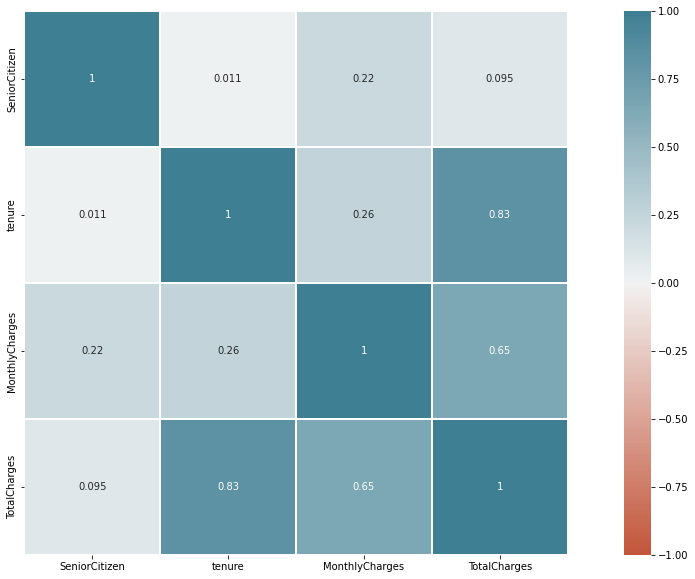

In [24]:
plt.figure(figsize=(20, 10))

sns.heatmap(X_train.corr(), annot=True, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            linewidth=1, square=True)
plt.show()

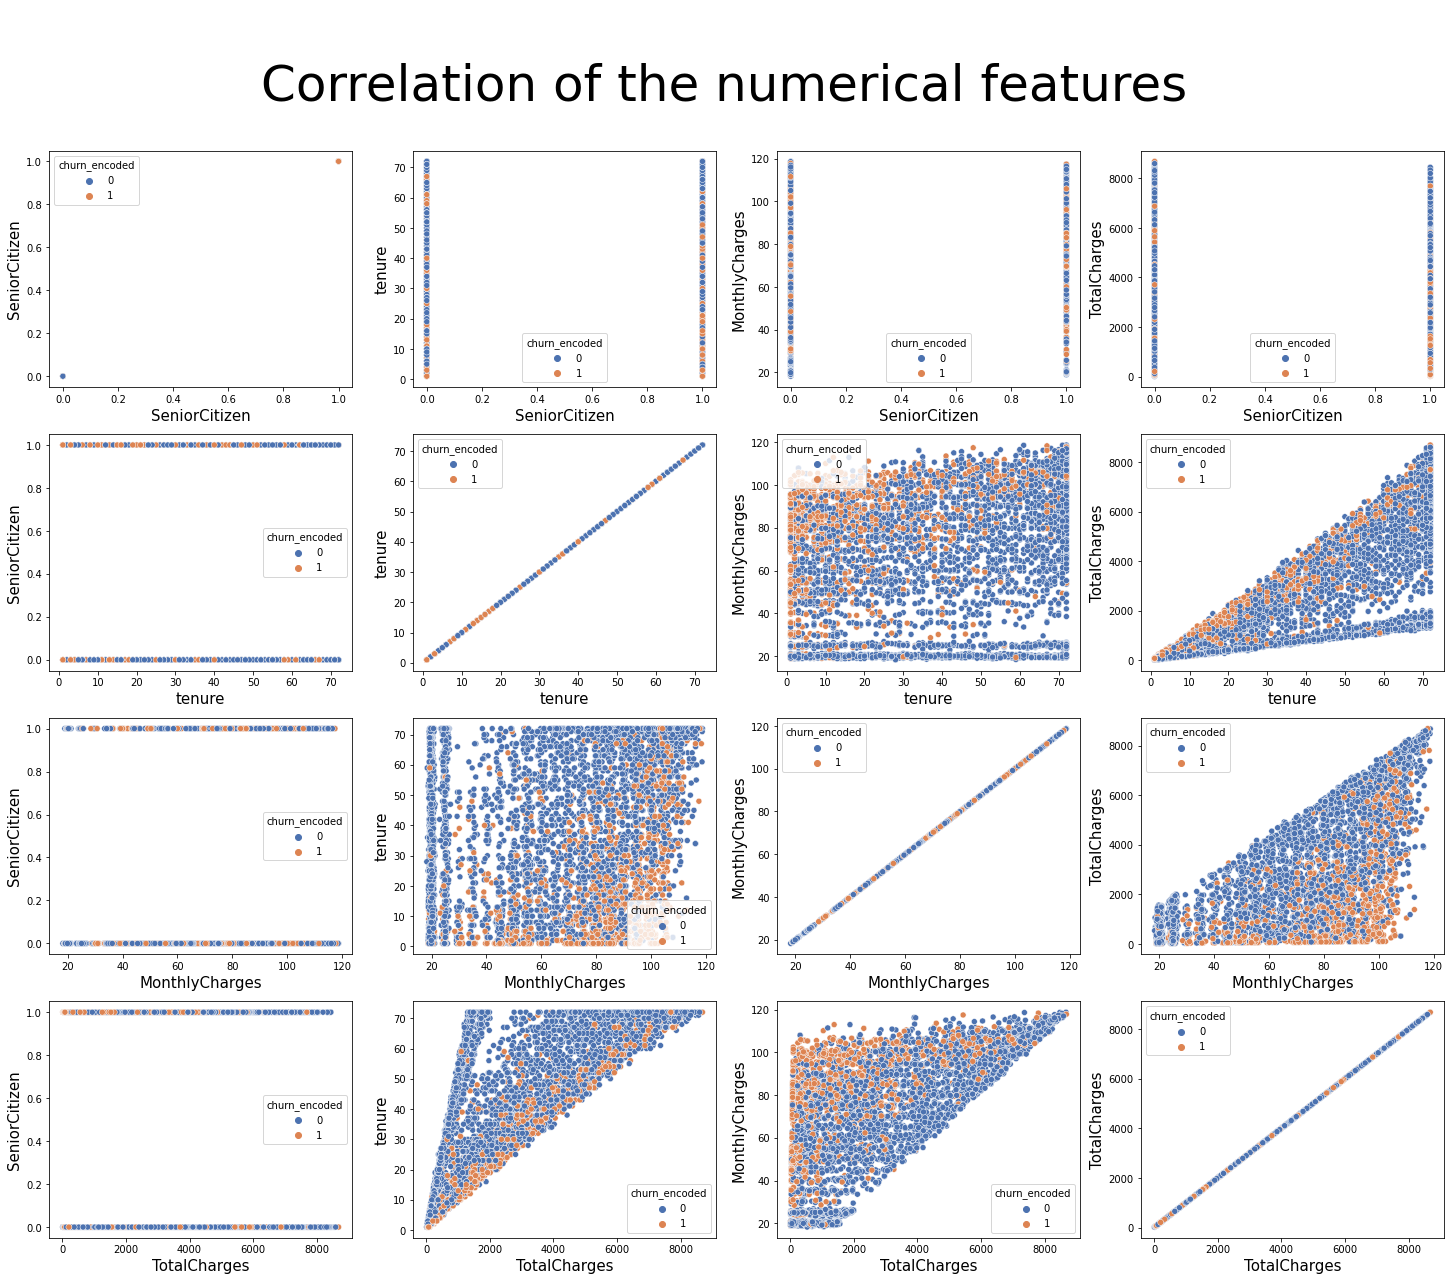

In [25]:
n_rows, n_cols = (4, 4)    # define number of rows and number of cols of the figure
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 20))
figure.suptitle("\nCorrelation of the numerical features\n", fontsize=50)

for i, cols in enumerate(numericals):
    for j, jcols in enumerate(numericals):
        fig = sns.scatterplot(data=X_train, x=cols, y=jcols, ax=axes[i, j], 
                              hue=y_train, palette='deep')
        axes[i, j].set_xlabel(cols, fontsize=15)
        axes[i, j].set_ylabel(jcols, fontsize=15)

plt.show()


>>> In the **above** **figure**, *Tenure* and the *TotalCharges* features are the most correlated numerical features to each other, MonthlyCharges and TotalCharges has some correlation too (this was also visible from the heatmap), but other than that there are almost none with the other features.

significance test for the numerical columns with the target columns

In [26]:
numericals.remove('SeniorCitizen')

In [27]:
numericals

['tenure', 'MonthlyCharges', 'TotalCharges']

In [28]:
categoricals

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [29]:
categoricals.append('SeniorCitizen')
categoricals

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

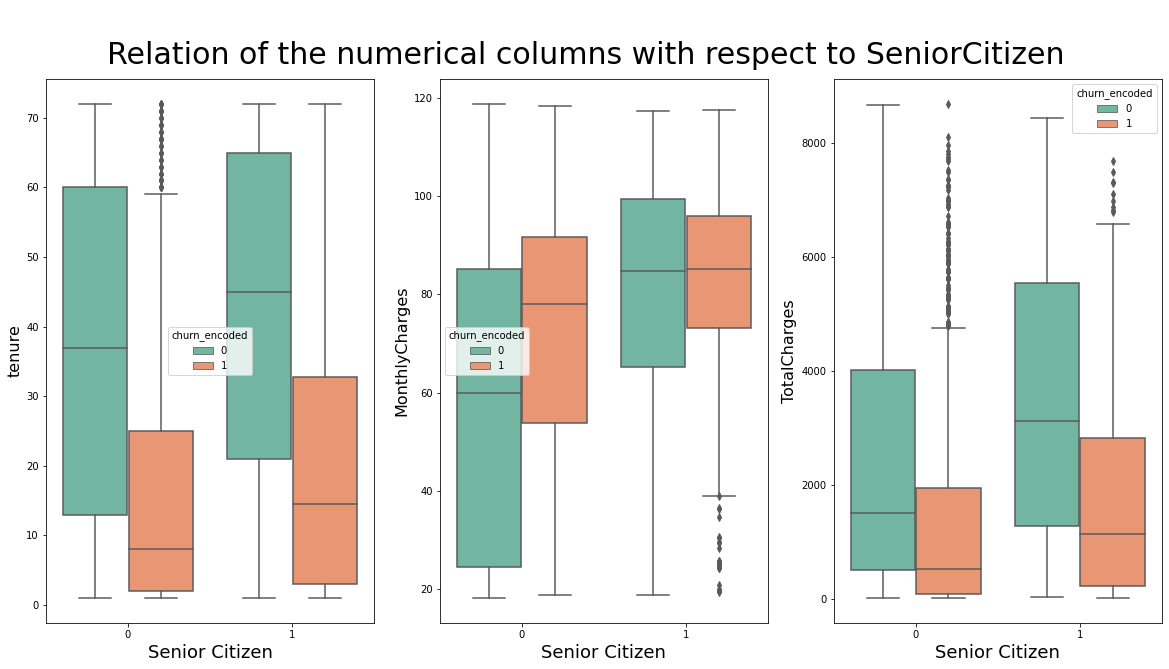

In [30]:
n_rows, n_cols = (1, 3)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))
figure.suptitle('\nRelation of the numerical columns with respect to SeniorCitizen\n', fontsize=30)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(numericals):
    fig = sns.boxplot(x=X_train['SeniorCitizen'], y=X_train[cols], ax=axes[j],
                      palette=sns.color_palette("Set2"), hue=y_train)
    axes[j].set_xlabel('Senior Citizen', fontsize=18)
    axes[j].set_ylabel(cols, fontsize=16)

plt.show()

In [31]:
# for j, cols in enumerate(numericals):
#     print(j, cols)

In [32]:
# numericals

## Creating a copy of the X_train data to do more analysis, we're gonna name it train_data

In [33]:
X_train['SeniorCitizen'].unique()

array([1, 0])

In [34]:
train_data = X_train.copy()    # copying the X_train data to train_data variable

In [35]:
train_data['churn'] = y_train.copy()

In [36]:
train_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
313,Female,1,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,341.60,0
633,Female,0,No,No,40,No,No phone service,DSL,Yes,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),54.55,2236.20,0
2709,Female,0,No,No,54,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),95.10,5064.85,0
409,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.60,19.60,1
5106,Female,1,No,No,50,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,83.40,4113.70,0
4272,Male,0,Yes,Yes,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.40,546.85,0
1943,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,1
601,Female,0,Yes,Yes,66,Yes,Yes,Fiber optic,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),74.25,4859.25,0
4185,Male,0,No,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.15,405.60,0
4916,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,35.75,35.75,1


## Numerical Data viz

In [37]:
numericals

['tenure', 'MonthlyCharges', 'TotalCharges']

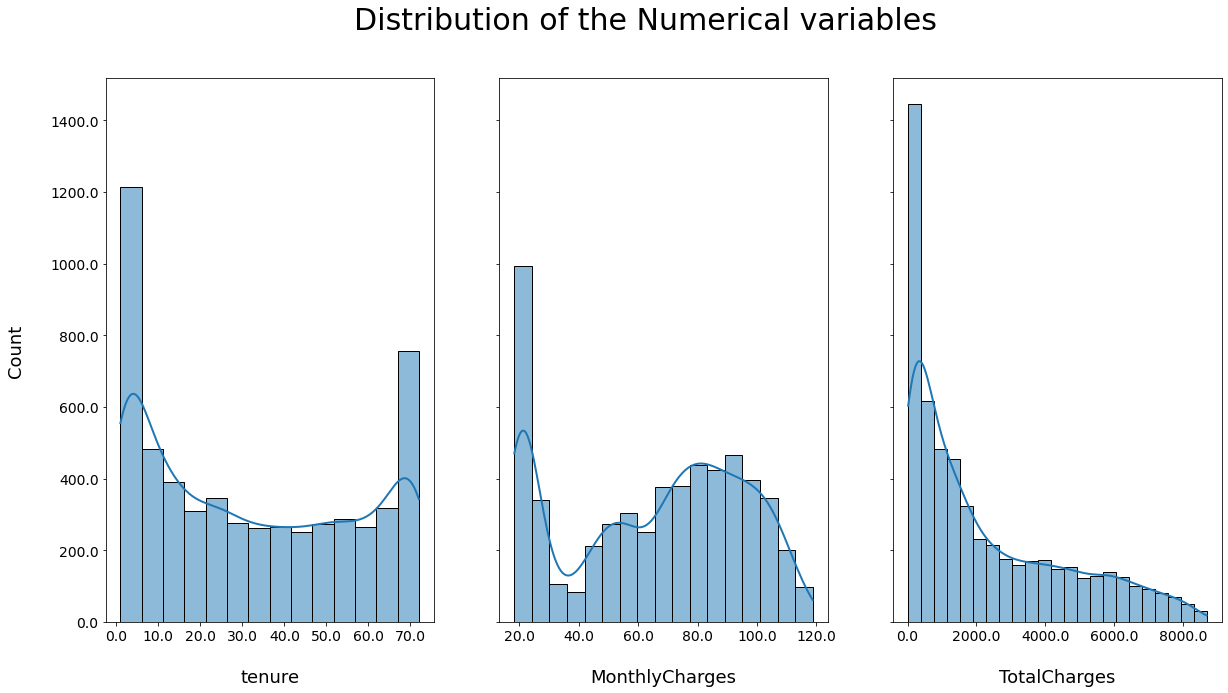

In [38]:
n_rows, n_cols = (1, 3)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10), sharey=True)
figure.suptitle("Distribution of the Numerical variables\n", fontsize=30)

for i, cols in enumerate(numericals):
    fig = sns.histplot(data=train_data, x=cols, kde=True, ax=axes[i],
                       palette='crest',
                       line_kws={"linewidth": 2,})
    axes[i].set_xlabel("\n" + cols, fontsize=18)
    axes[i].set_xticklabels(axes[i].get_xticks(),fontsize=14)
    axes[i].set_yticklabels(axes[i].get_yticks(),fontsize=14)

axes[0].set_ylabel('Count\n', fontsize=18)

plt.show()

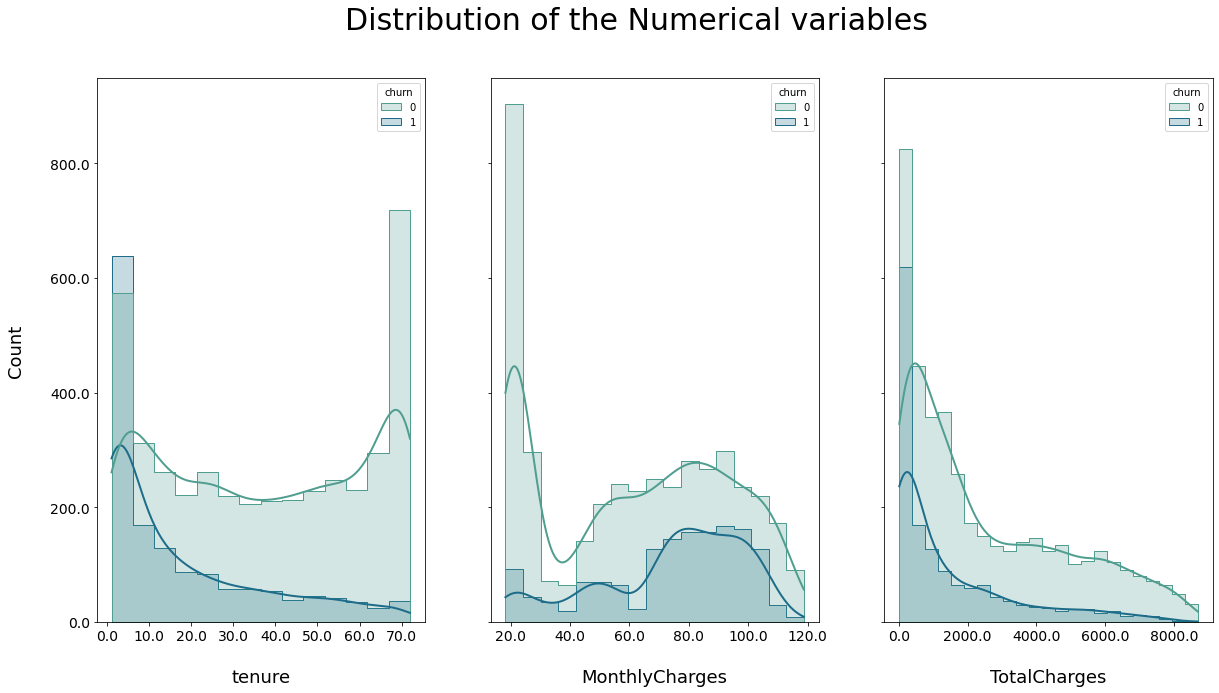

In [39]:
n_rows, n_cols = (1, 3)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10), sharey=True)
figure.suptitle("Distribution of the Numerical variables\n", fontsize=30)

for i, cols in enumerate(numericals):
    fig = sns.histplot(data=train_data, x=cols, kde=True, ax=axes[i],
                       line_kws={"linewidth": 2,},
                       palette='crest',
                       hue='churn', 
                       element='step')
    
    axes[i].set_xlabel("\n" + cols, fontsize=18)
    axes[i].set_xticklabels(axes[i].get_xticks(),fontsize=14)
    axes[i].set_yticklabels(axes[i].get_yticks(),fontsize=14)

axes[0].set_ylabel('Count\n', fontsize=18)

plt.show()

In [40]:
train_data[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(['skew', 'kurtosis']).T

,skew,kurtosis
tenure,0.252196,-1.379198
MonthlyCharges,-0.218141,-1.258500
TotalCharges,0.972690,-0.205190


The numerical data are not well distributed which can be visualized by the figure above. Also with the skewness and the kurtosis table it is evident that the the data are more ***Playkrutic***.

In [41]:
print(categoricals)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [42]:
binary_cats = []
ternary_cats = []
multiple_cats = []


for col_name in categoricals:
    if train_data[col_name].nunique() == 2:
        binary_cats.append(col_name)
    elif train_data[col_name].nunique() == 3:
        ternary_cats.append(col_name)
    else:
        multiple_cats.append(col_name)


In [43]:
print("These are binary cats with the length {}: \n{}".format(len(binary_cats), binary_cats))
print("\n")
print("These are ternary cats with the length {}: \n{}".format(len(ternary_cats), ternary_cats))
print("\n")
print("These are mutlitple cats with the length {}: \n{}".format(len(multiple_cats), multiple_cats))
print("\n")
print("These are numericals features with the length {}: \n{}".format(len(numericals), numericals))

These are binary cats with the length 5: 
['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']


These are ternary cats with the length 9: 
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']


These are mutlitple cats with the length 1: 
['PaymentMethod']


These are numericals features with the length 3: 
['tenure', 'MonthlyCharges', 'TotalCharges']


## Countplot of the churn column

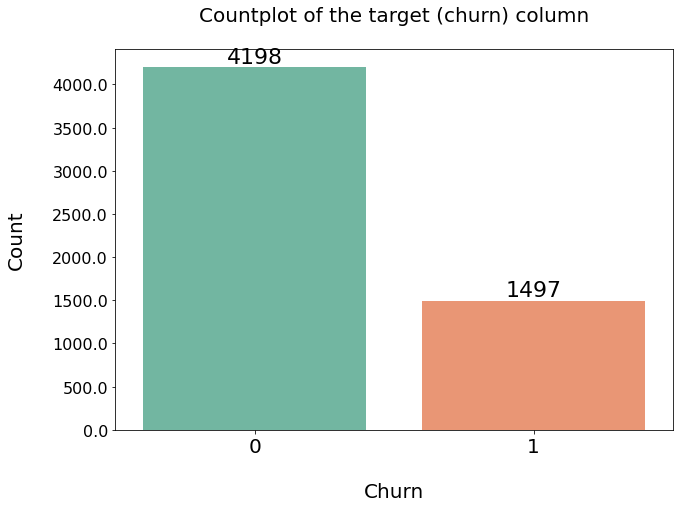

In [44]:
plt.figure(figsize=(10, 7))

fig = sns.countplot(x=train_data['churn'],
                    order=train_data['churn'].value_counts(ascending=False).index,
                    palette=sns.color_palette("Set2"))
fig.set_xlabel("\n" + "Churn", fontsize=20)
fig.set_ylabel("Count\n", fontsize=20)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=20)
fig.set_yticklabels(fig.get_yticks(), fontsize=16)

for p, val in zip(fig.patches, train_data['churn'].value_counts(ascending=False)):
    fig.annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()),
                 xytext=(0, 4),
                 textcoords='offset points',
                 fontsize=22, ha='center')
plt.title("Countplot of the target (churn) column\n", fontsize=20)
plt.show()

So, there's a imbalance in the dataset. Most of the customers didn't churn

## Countplots (Binary Categories)

Countplot for the binary categorical columns

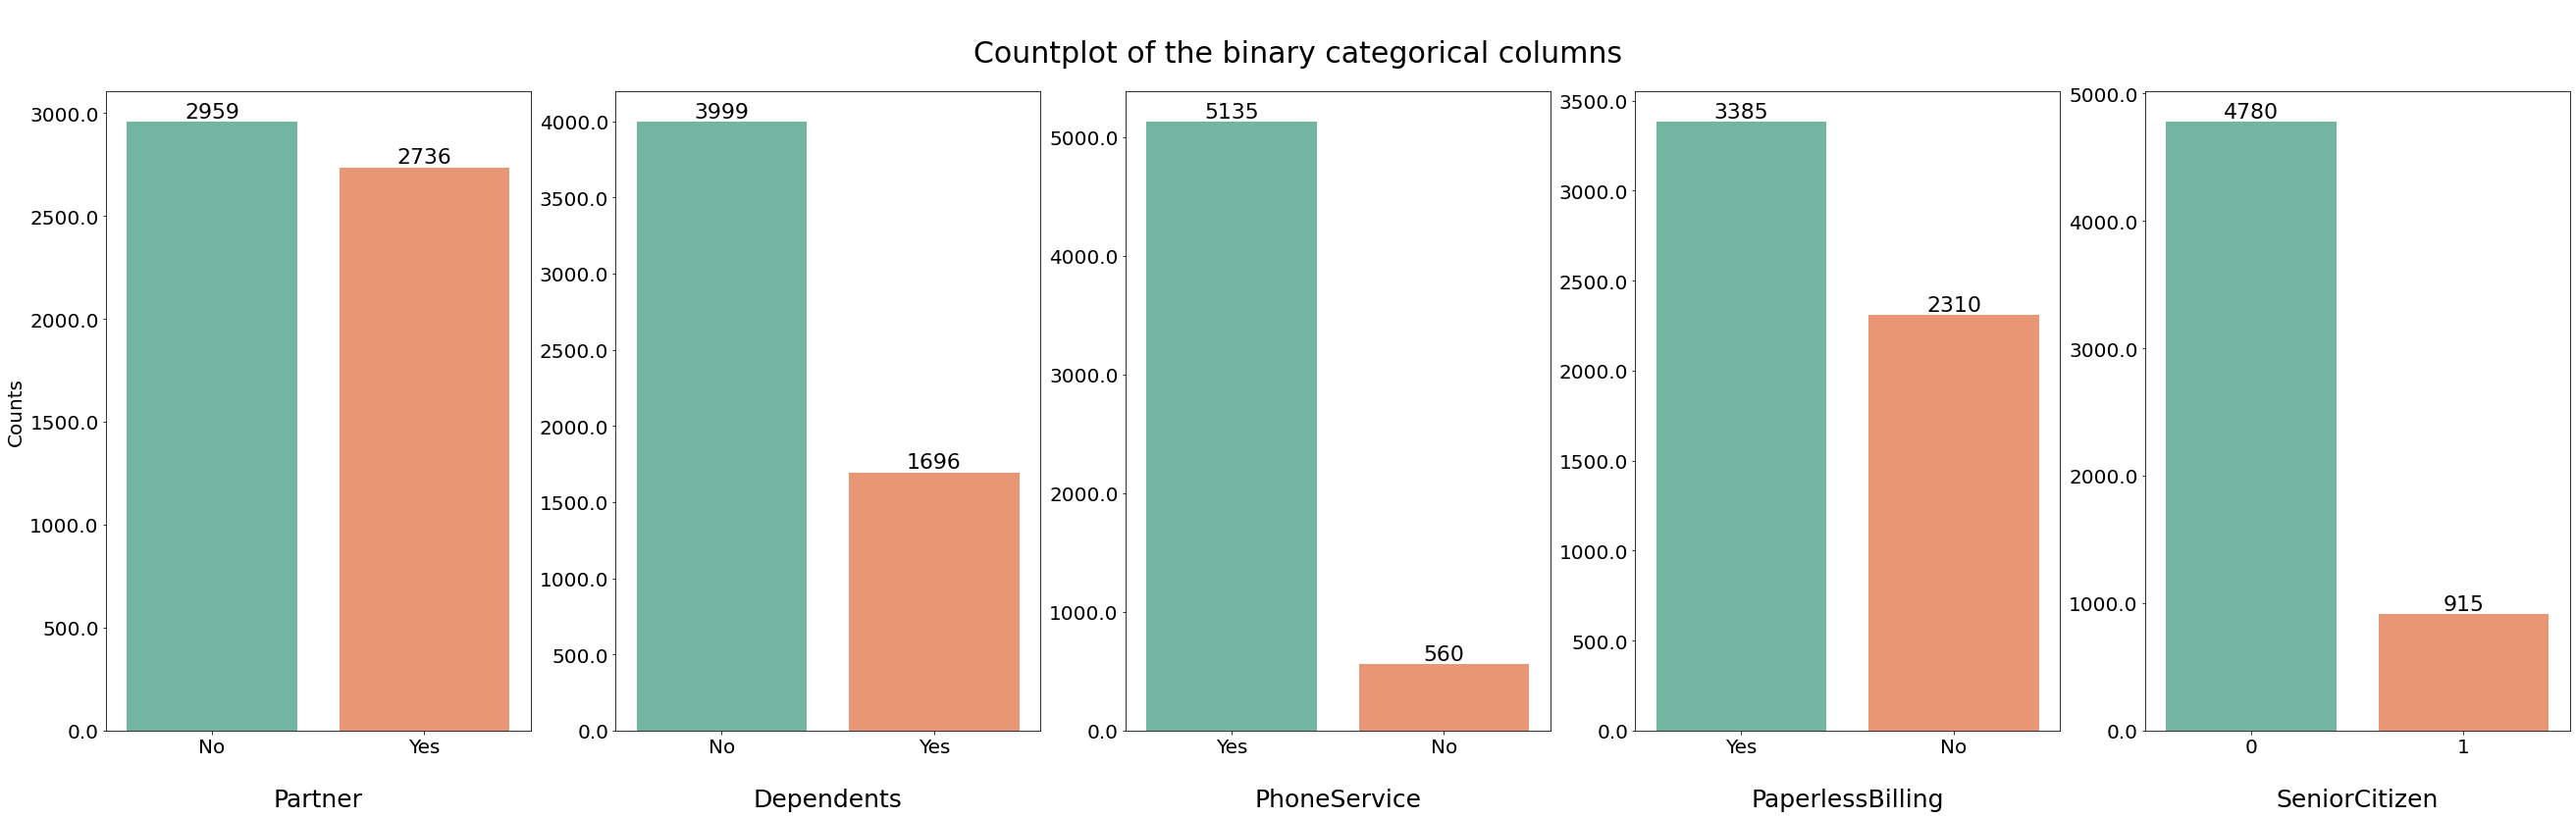

In [45]:
n_rows, n_cols = (1, 5)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 12), sharey=False)
figure.suptitle('\nCountplot of the binary categorical columns\n\n', fontsize=30)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(binary_cats):
    fig = sns.countplot(x=train_data[cols], ax=axes[j],
                        order=train_data[cols].value_counts(ascending=False).index,
                        palette=sns.color_palette("Set2"),)
    axes[j].set_xlabel("\n" + cols, fontsize=25)
    axes[j].set_ylabel('', fontsize=18)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=20)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    fig.set_yticklabels(fig.get_yticks(), fontsize = 20)

    for p, val in zip(axes[j].patches, train_data[cols].value_counts(ascending=False)):
        axes[j].annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()+0.6),
                         xytext=(0, 4),
                         textcoords='offset points', 
                         fontsize=22, ha='center')


axes[0].set_ylabel('Counts', fontsize=20)
# plt.tight_layout()
plt.show()

>>> Looks like most of the customers don't have **dependencies**(children, parent etc), uses **phoneservice**, uses **paperlessbilling** and are not **seniorcitizen**, the **partner** columns is kind of shared.

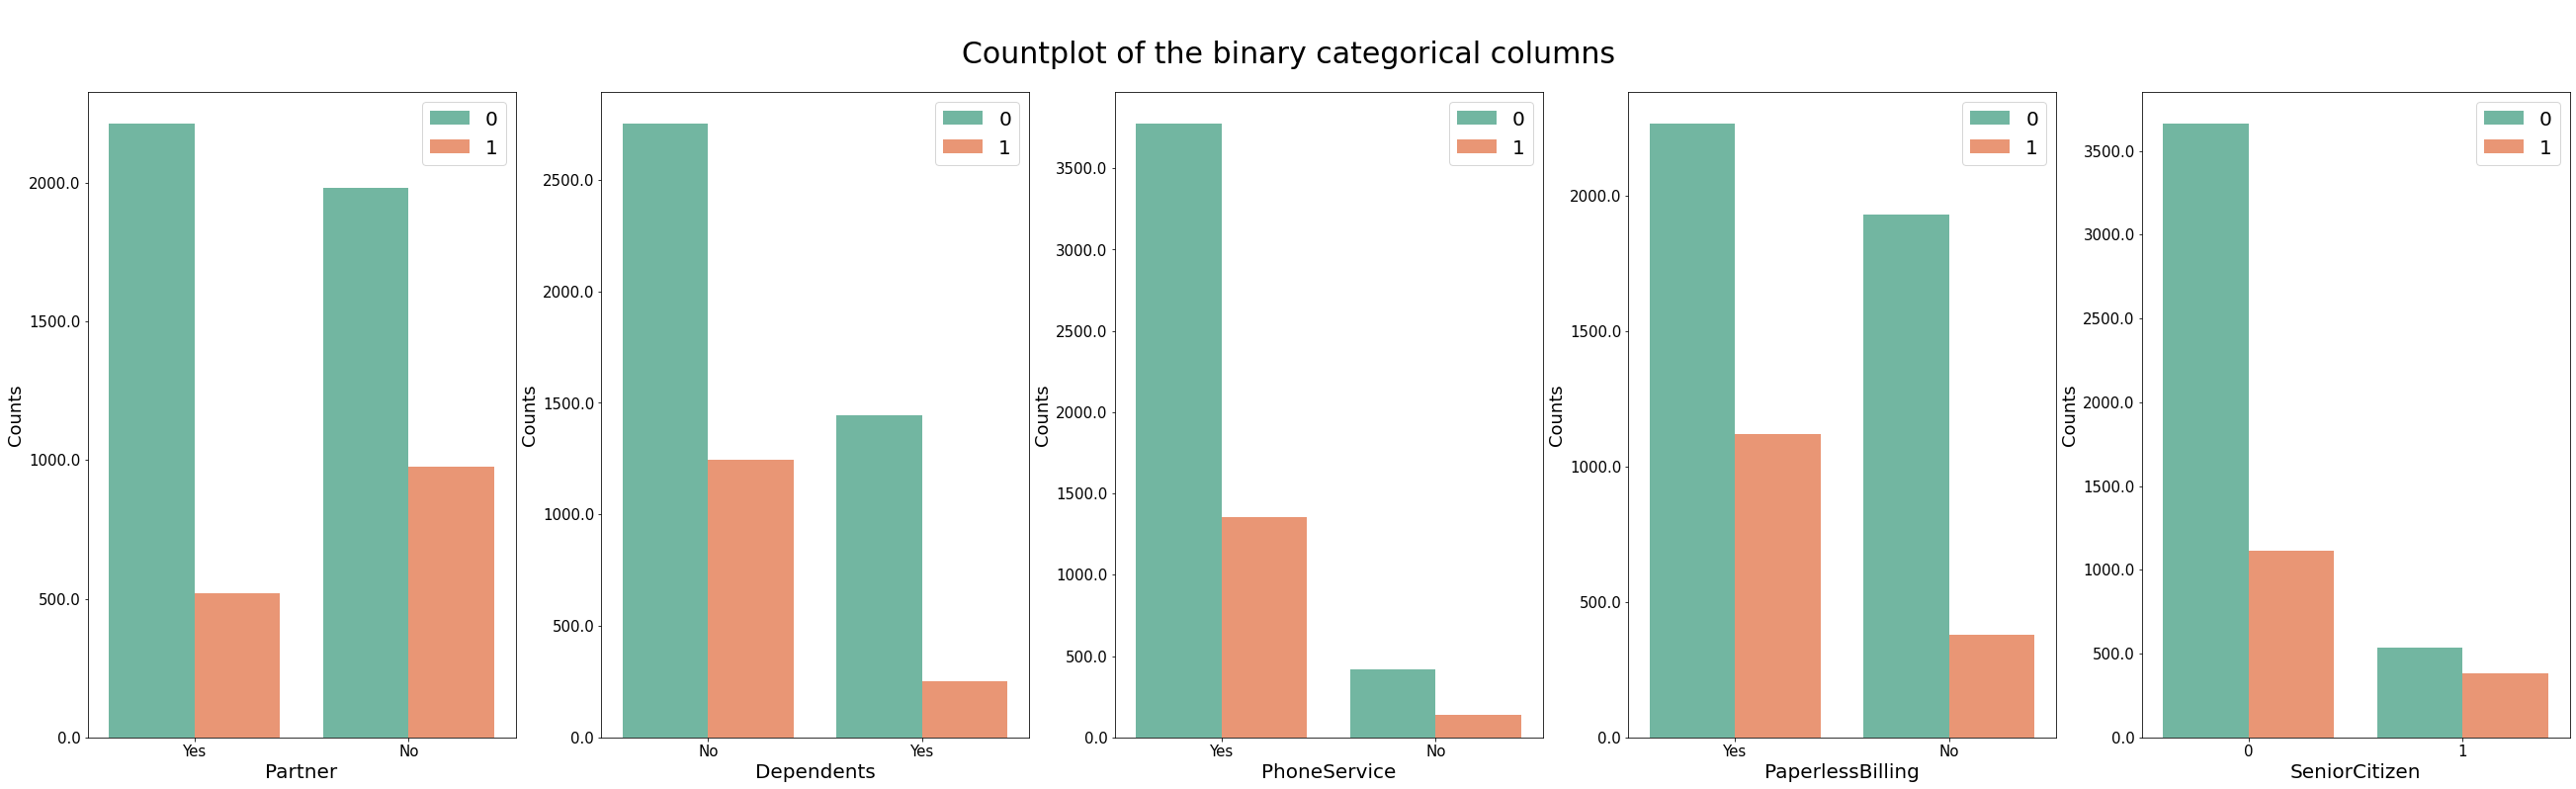

In [46]:
n_rows, n_cols = (1, 5)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 12), sharey=False)
figure.suptitle('\nCountplot of the binary categorical columns\n', fontsize=30)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(binary_cats):
    fig = sns.countplot(x=train_data[cols], ax=axes[j],
                      palette=sns.color_palette("Set2"), hue=train_data['churn'])
    axes[j].set_xlabel(cols, fontsize=20)
    axes[j].set_ylabel('Counts', fontsize=18)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=15)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    axes[j].legend(fontsize=20)
    fig.set_yticklabels(fig.get_yticks(), size = 15)



# plt.tight_layout()
plt.show()

In [47]:
for bin_cols in binary_cats:
    print(train_data.groupby(bin_cols)['churn'].sum())
    print("--" * 70)
    print(train_data.groupby(bin_cols)['churn'].value_counts())
    print("--" * 70)
    print(train_data.groupby(bin_cols)['churn'].mean())
    print("\n")

Partner
No     976
Yes    521
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Partner  churn
No       0        1983
         1         976
Yes      0        2215
         1         521
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Partner
No     0.329841
Yes    0.190424
Name: churn, dtype: float64


Dependents
No     1245
Yes     252
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Dependents  churn
No          0        2754
            1        1245
Yes         0        1444
            1         252
Name: churn, dtype: int64
-------------------------------------------------------------------------------------------------------------

>>> People tend to churn less if they haave **partners**, **dependents**, **don't** use **paperlessbillling** and are not **seniorcitizens**.

>>>Although, most of the poeple don't have **dependencies**, don't use **phoneservice** and are not **seniorcitizens**

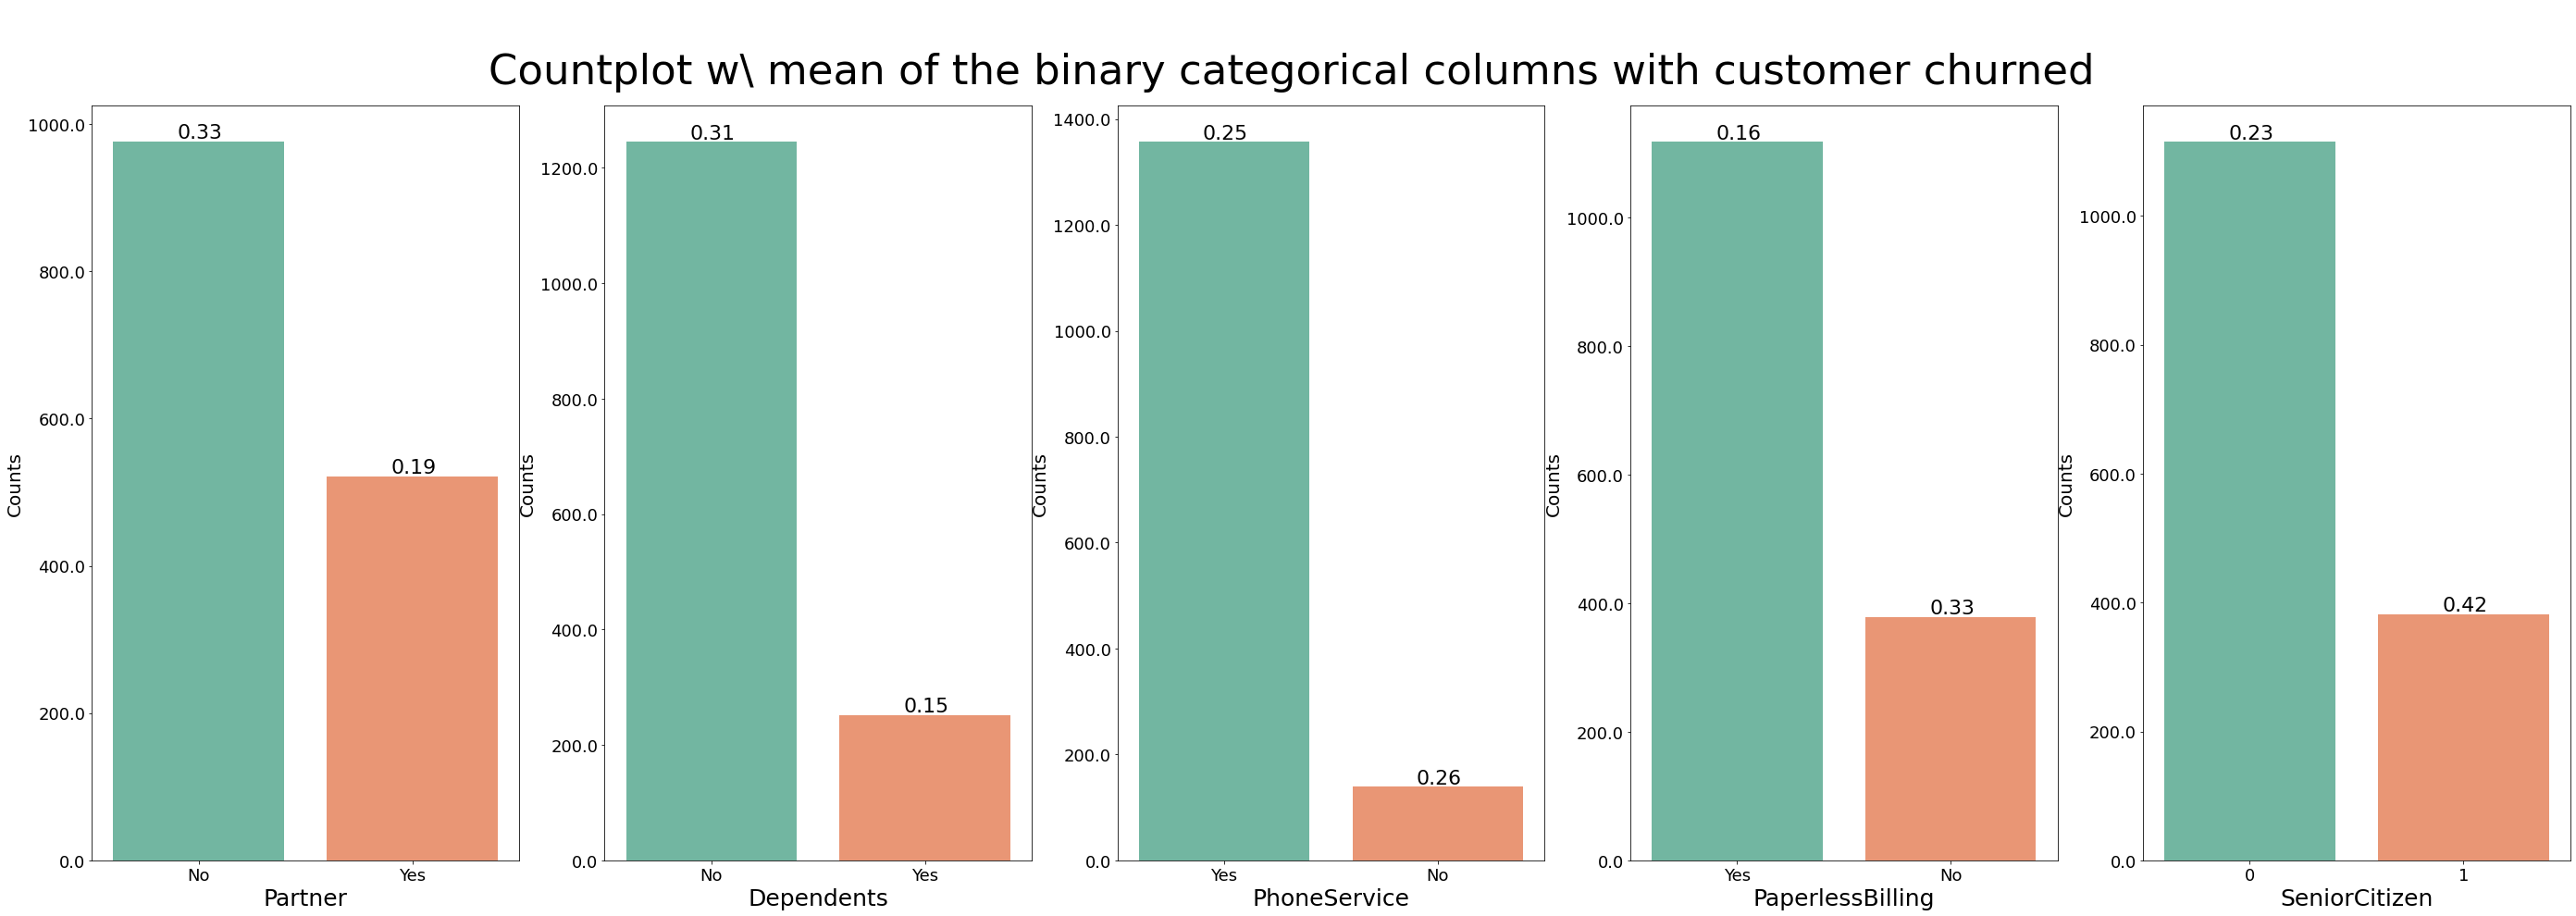

In [48]:
n_rows, n_cols = (1, 5)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(48, 15))
figure.suptitle('\nCountplot w\ mean of the binary categorical columns with customer churned\n\n', fontsize=45)

# i = 0

for j, cols in enumerate(binary_cats):
    churn_mean_rate = train_data.groupby(cols)['churn'].mean().to_list()
    fig = sns.countplot(x=train_data[train_data['churn'] == 1][cols],
                        palette=sns.color_palette("Set2"), ax=axes[j])
    axes[j].set_xlabel(cols, fontsize=25)
    axes[j].set_ylabel('Counts', fontsize=20)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=18)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    # axes[j].legend(fontsize=20)
    fig.set_yticklabels(fig.get_yticks(), size=18)
    for p, label in zip(axes[j].patches, churn_mean_rate):
        axes[j].annotate("%.2f"%label, (p.get_x()+0.3, p.get_height()+5.0), fontsize=22)

plt.show()

In [49]:
pd.pivot_table(
    data=train_data,
    index=['Partner', 'Dependents'],
    values='churn',
    aggfunc=['mean', 'sum']
)

mean   sum
                       churn churn
Partner Dependents                
No      No          0.342076   913
        Yes         0.217241    63
Yes     No          0.249624   332
        Yes         0.134424   189

In [50]:
print(train_data[(train_data['Partner'] == 'Yes') & (train_data['Dependents'] == 'Yes')]['churn'].value_counts())
print("--" * 70)
print(train_data[(train_data['Partner'] == 'No') & (train_data['Dependents'] == 'No')]['churn'].value_counts())

0    1217
1     189
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
0    1756
1     913
Name: churn, dtype: int64


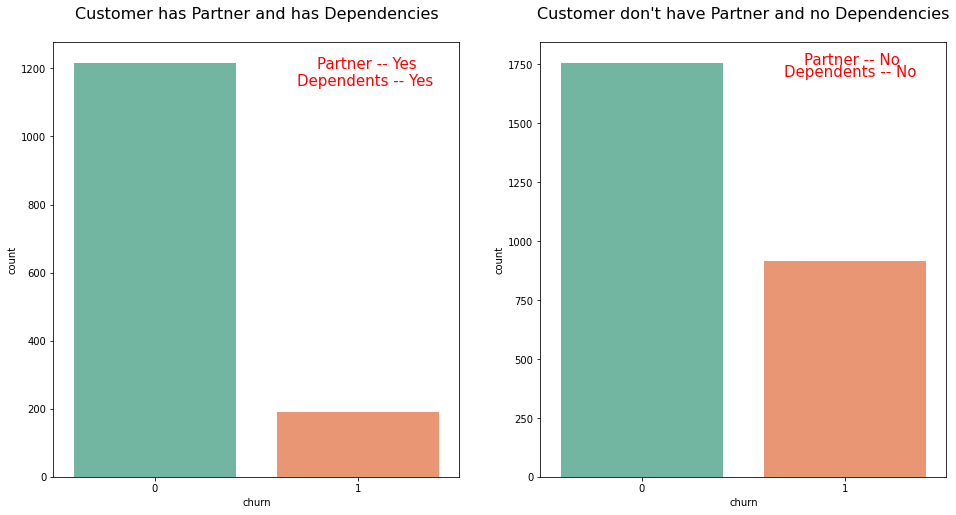

In [51]:
plt.figure(figsize=(16, 8))

plt.subplot(121); 
ax1 = sns.countplot(x=train_data[(train_data['Partner'] == 'Yes') & (train_data['Dependents'] == 'Yes')]['churn'],
               palette=sns.color_palette("Set2"))
ax1.set_title("Customer has Partner and has Dependencies\n", fontsize=16)
ax1.text(0.8, 1200, "Partner -- Yes", fontsize=15, c='r')
ax1.text(0.7, 1150, "Dependents -- Yes", fontsize=15, c='r')

plt.subplot(122);

ax2 = sns.countplot(x=train_data[(train_data['Partner'] == 'No') & (train_data['Dependents'] == 'No')]['churn'],
               palette=sns.color_palette("Set2"))
ax2.set_title("Customer don't have Partner and no Dependencies\n", fontsize=16)
ax2.text(0.8, 1750, "Partner -- No", fontsize=15, c='r')
ax2.text(0.7, 1700, "Dependents -- No", fontsize=15, c='r')

plt.show()

>>> Customer tends to churn more when they don't have partners or have no dependencies.

In [52]:
pd.pivot_table(
    data=train_data,
    index=['SeniorCitizen', 'Dependents'],
    values='churn',
    aggfunc=['mean', 'sum']
)

mean   sum
                             churn churn
SeniorCitizen Dependents                
0             No          0.279099   880
              Yes         0.144438   235
1             No          0.431442   365
              Yes         0.246377    17

In [53]:
print(train_data[(train_data['SeniorCitizen'] == 1) & (train_data['Dependents'] == 'Yes')]['churn'].value_counts())
print("--" * 70)
print(train_data[(train_data['SeniorCitizen'] == 0) & (train_data['Dependents'] == 'No')]['churn'].value_counts())

0    52
1    17
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
0    2273
1     880
Name: churn, dtype: int64


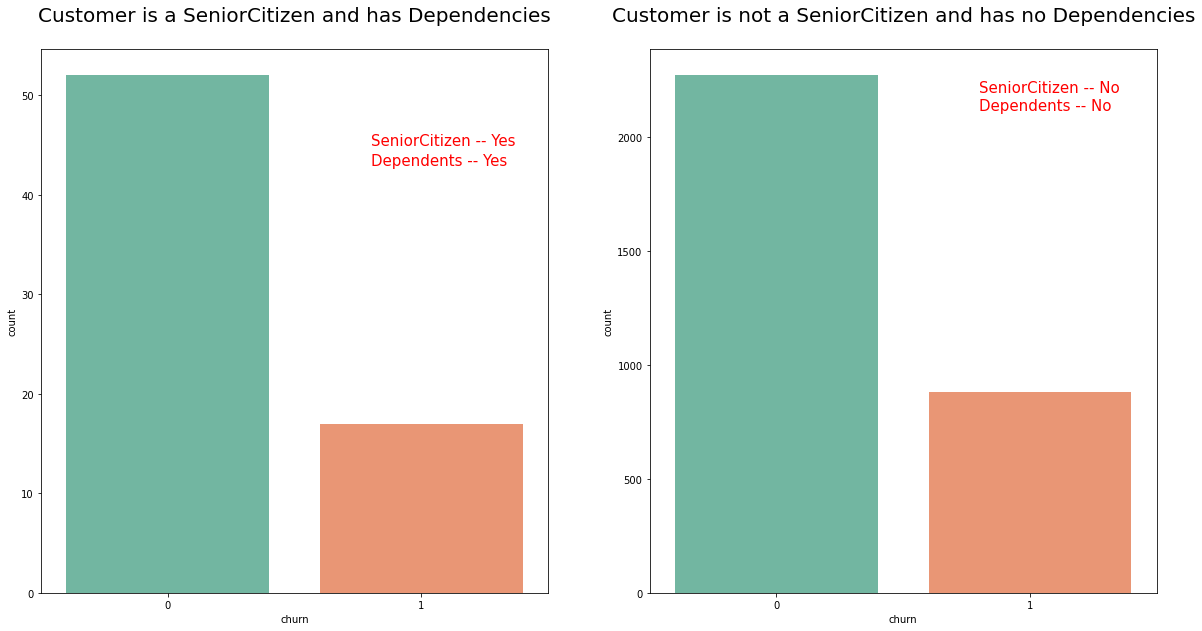

In [54]:
plt.figure(figsize=(20, 10))

plt.subplot(121); 
ax1 = sns.countplot(x=train_data[(train_data['SeniorCitizen'] == 1) & (train_data['Dependents'] == 'Yes')]['churn'],
               palette=sns.color_palette("Set2"))
ax1.set_title("Customer is a SeniorCitizen and has Dependencies\n", fontsize=20)
ax1.text(0.8, 45, "SeniorCitizen -- Yes", fontsize=15, c='r')
ax1.text(0.8, 43, "Dependents -- Yes", fontsize=15, c='r')

plt.subplot(122);

ax2 = sns.countplot(x=train_data[(train_data['SeniorCitizen'] == 0) & (train_data['Dependents'] == 'No')]['churn'],
               palette=sns.color_palette("Set2"))
ax2.set_title("Customer is not a SeniorCitizen and has no Dependencies\n", fontsize=20)
ax2.text(0.8, 2200, "SeniorCitizen -- No", fontsize=15, c='r')
ax2.text(0.8, 2120, "Dependents -- No", fontsize=15, c='r')

plt.show()

>>> There's actually not a lot of differences here, only **2%**. There are not a lot of customers who are Senior Citizen, so it's quite normal that the percentage of having dependencies while being a Senior Citizen in this dataset is low.  

In [55]:
# binary_cats[:-1]

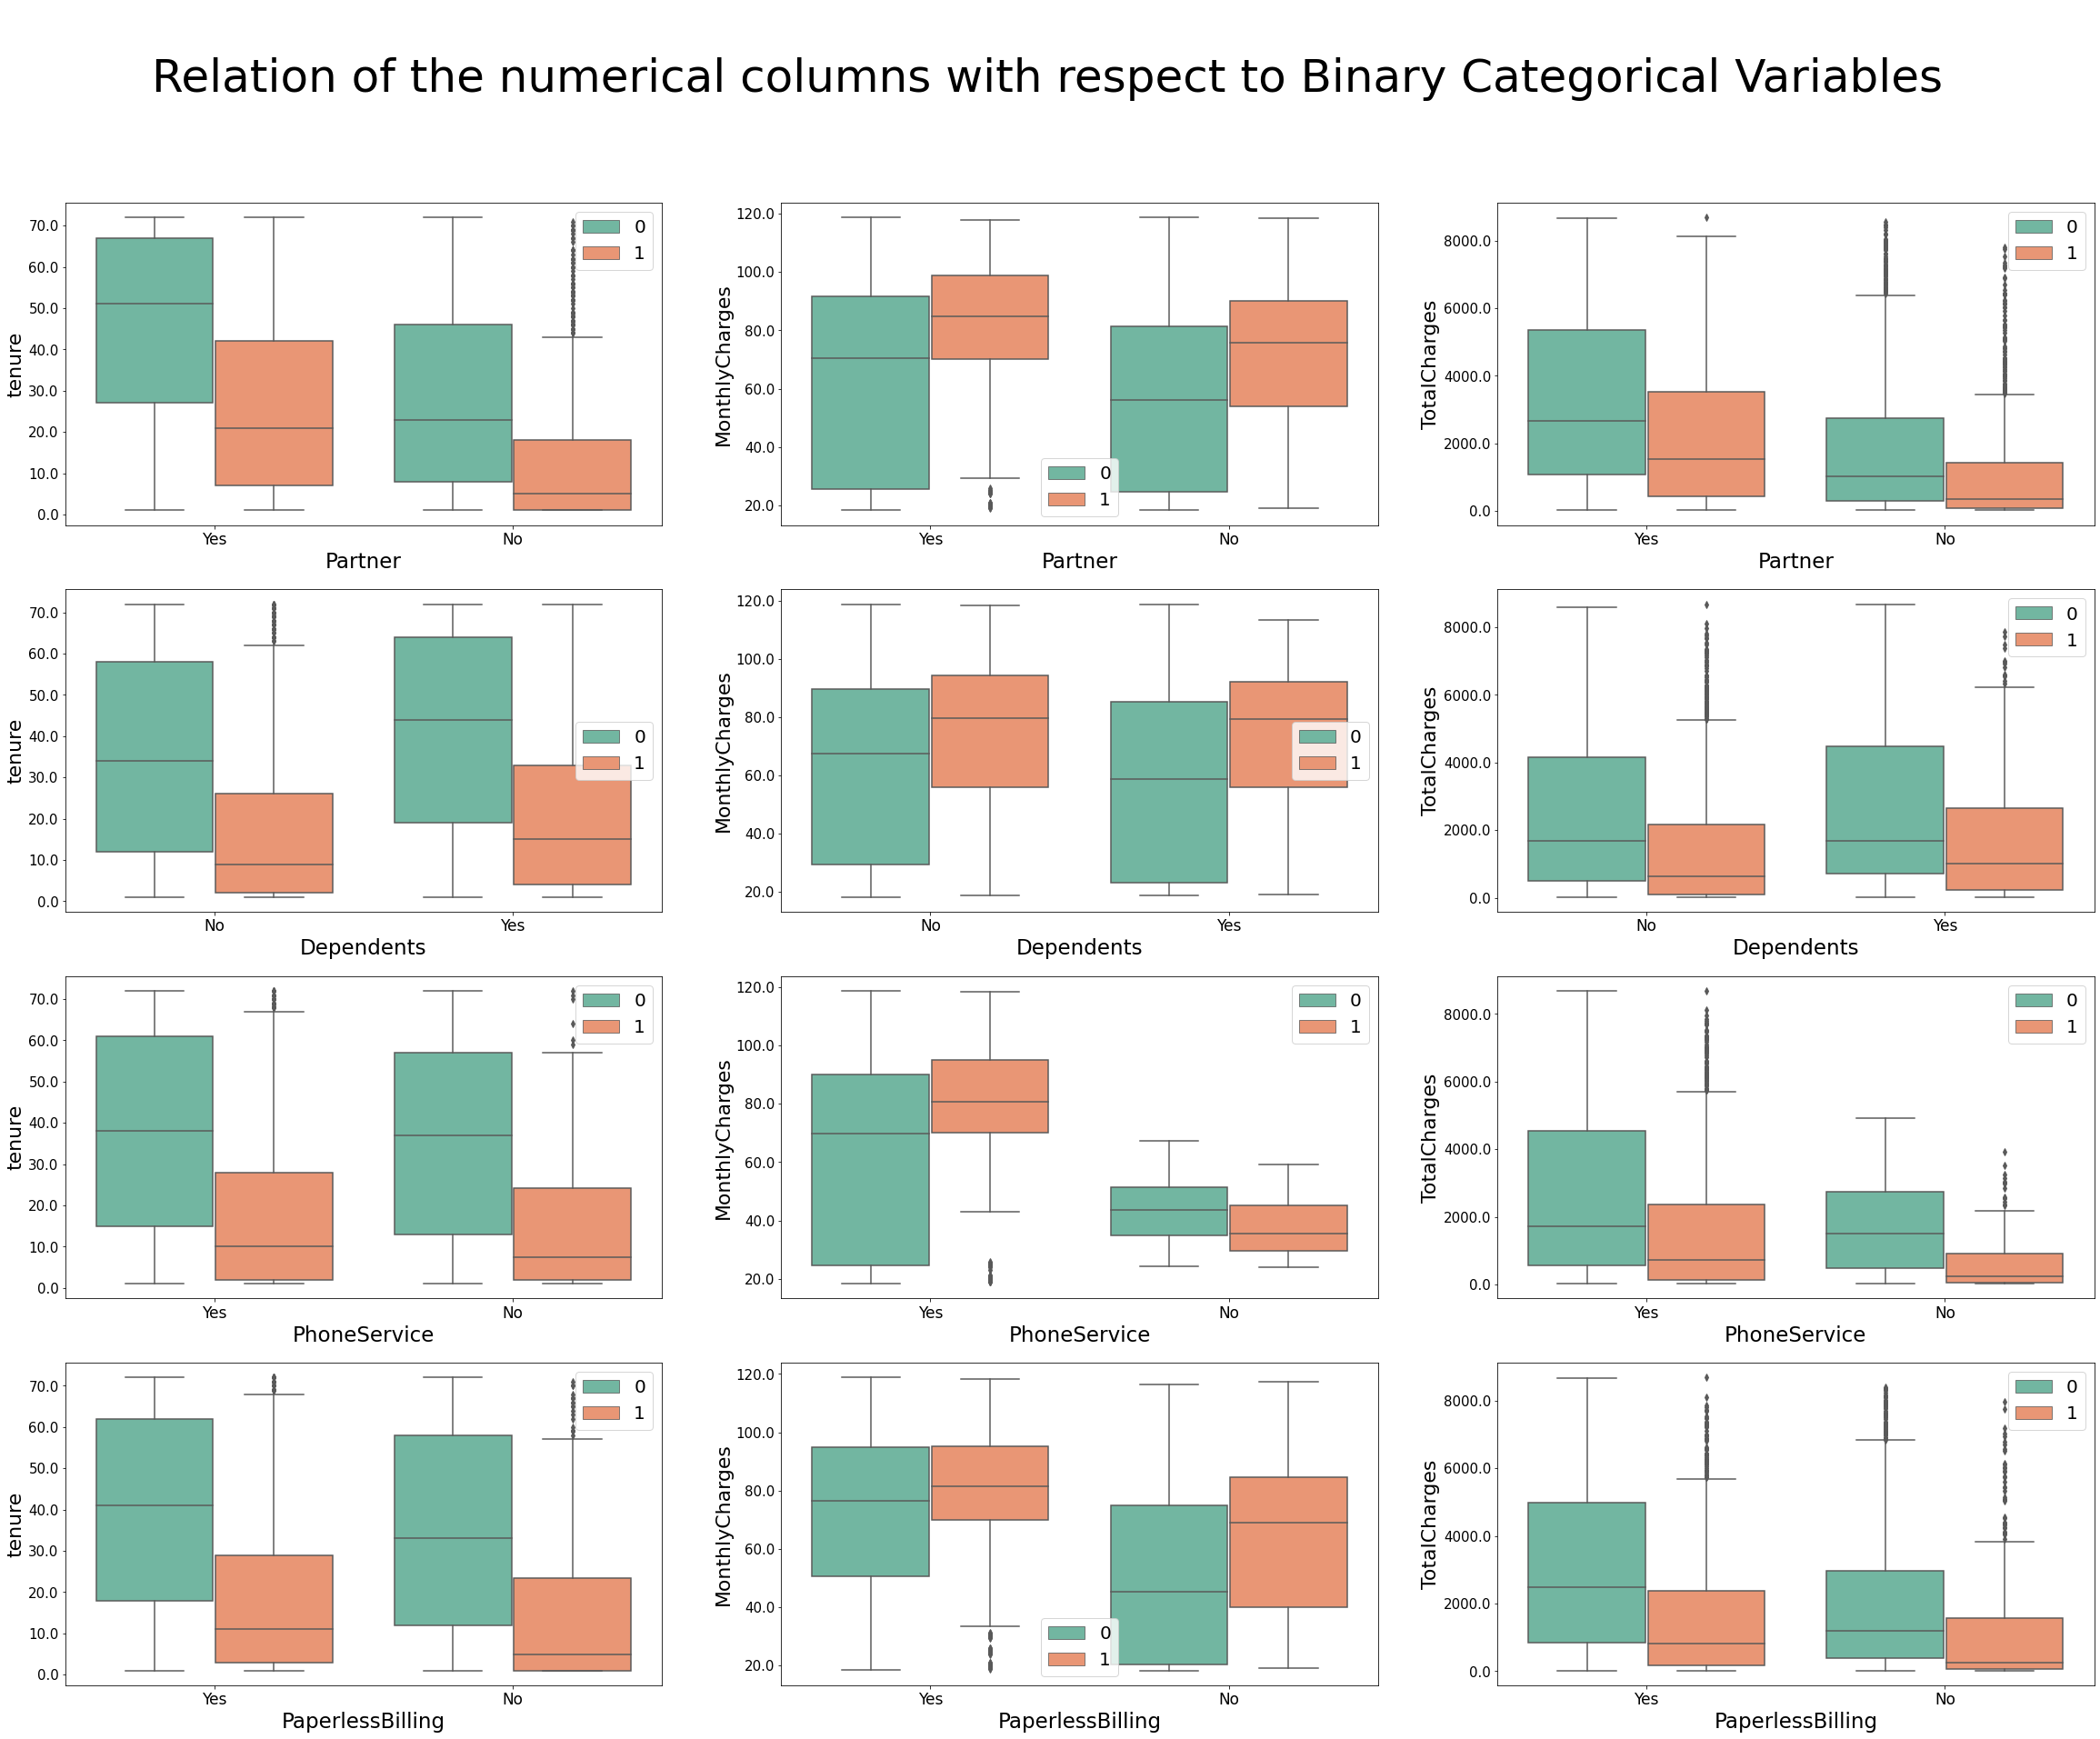

In [56]:
n_rows, n_cols = (4, 3)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 30))
figure.suptitle('\nRelation of the numerical columns with respect to Binary Categorical Variables\n', fontsize=50)
# axes = axes.flatten()

for i, cat_cols in enumerate(binary_cats[:-1]):
    for j, num_cols in enumerate(numericals):
        fig = sns.boxplot(x=train_data[cat_cols], y=train_data[num_cols], ax=axes[i, j],
                        palette=sns.color_palette("Set2"), hue=train_data['churn'],)
        axes[i, j].set_xlabel(cat_cols, fontsize=23)
        axes[i, j].set_ylabel(num_cols, fontsize=22)
        axes[i, j].legend(fontsize=20)
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), fontsize=17)
        axes[i, j].set_yticklabels(axes[i, j].get_yticks(), fontsize=15)

# show the plot
plt.show()

>>> Therer are a quite lot of outliers here and there, which needs to be investigated (later perhaps)

In [57]:
for cols in binary_cats:
    print("Category: " + cols + "\n")

    print(pd.pivot_table(
        data=train_data,
        index='churn',
        columns=[cols],
        values=['tenure', 'MonthlyCharges', 'TotalCharges'],
        aggfunc=['mean']
    ))
    print("\n" + "--" * 70)

Category: Partner

                  mean                                                  \
        MonthlyCharges            TotalCharges                  tenure   
Partner             No        Yes           No          Yes         No   
churn                                                                    
0            57.420348  65.099842  1802.010666  3234.573521  27.680787   
1            71.283248  79.727159  1079.498873  2258.013916  13.071721   

                    
                    
Partner        Yes  
churn               
0        46.093002  
1        25.946257  

--------------------------------------------------------------------------------------------------------------------------------------------
Category: Dependents

                     mean                                                  \
           MonthlyCharges            TotalCharges                  tenure   
Dependents             No        Yes           No          Yes         No   
churn          

>>> Mean MonthlyCharges are higher for the customers who has churned for all the categories.

>>> Mean TotalCharges are lower for the customers who has churnd for all the catgories. This is related to tenure which indicates total months the customer stayed with the company.

>>> Mean tenure is lower for the customers who has churned all the categories. Churned customer stayed less amount time with the company. 

The assumptions are, when the customer has to pay more monthly charges they tend leave the company early, so the tenure for them with the company is less. And as they stayed with the company for short amount time, the total charges are less than the customers who stayed for longer period of time.

In [58]:
# for bin_cols in binary_cats[:-1]:
#     print(train_data.groupby(bin_cols)['churn'].sum())
#     # print(train_data.groupby(bin_cols)['churn'].value_counts())
#     print("--" * 70)
#     print(train_data.groupby(bin_cols)['churn'].mean())
#     print("\n")

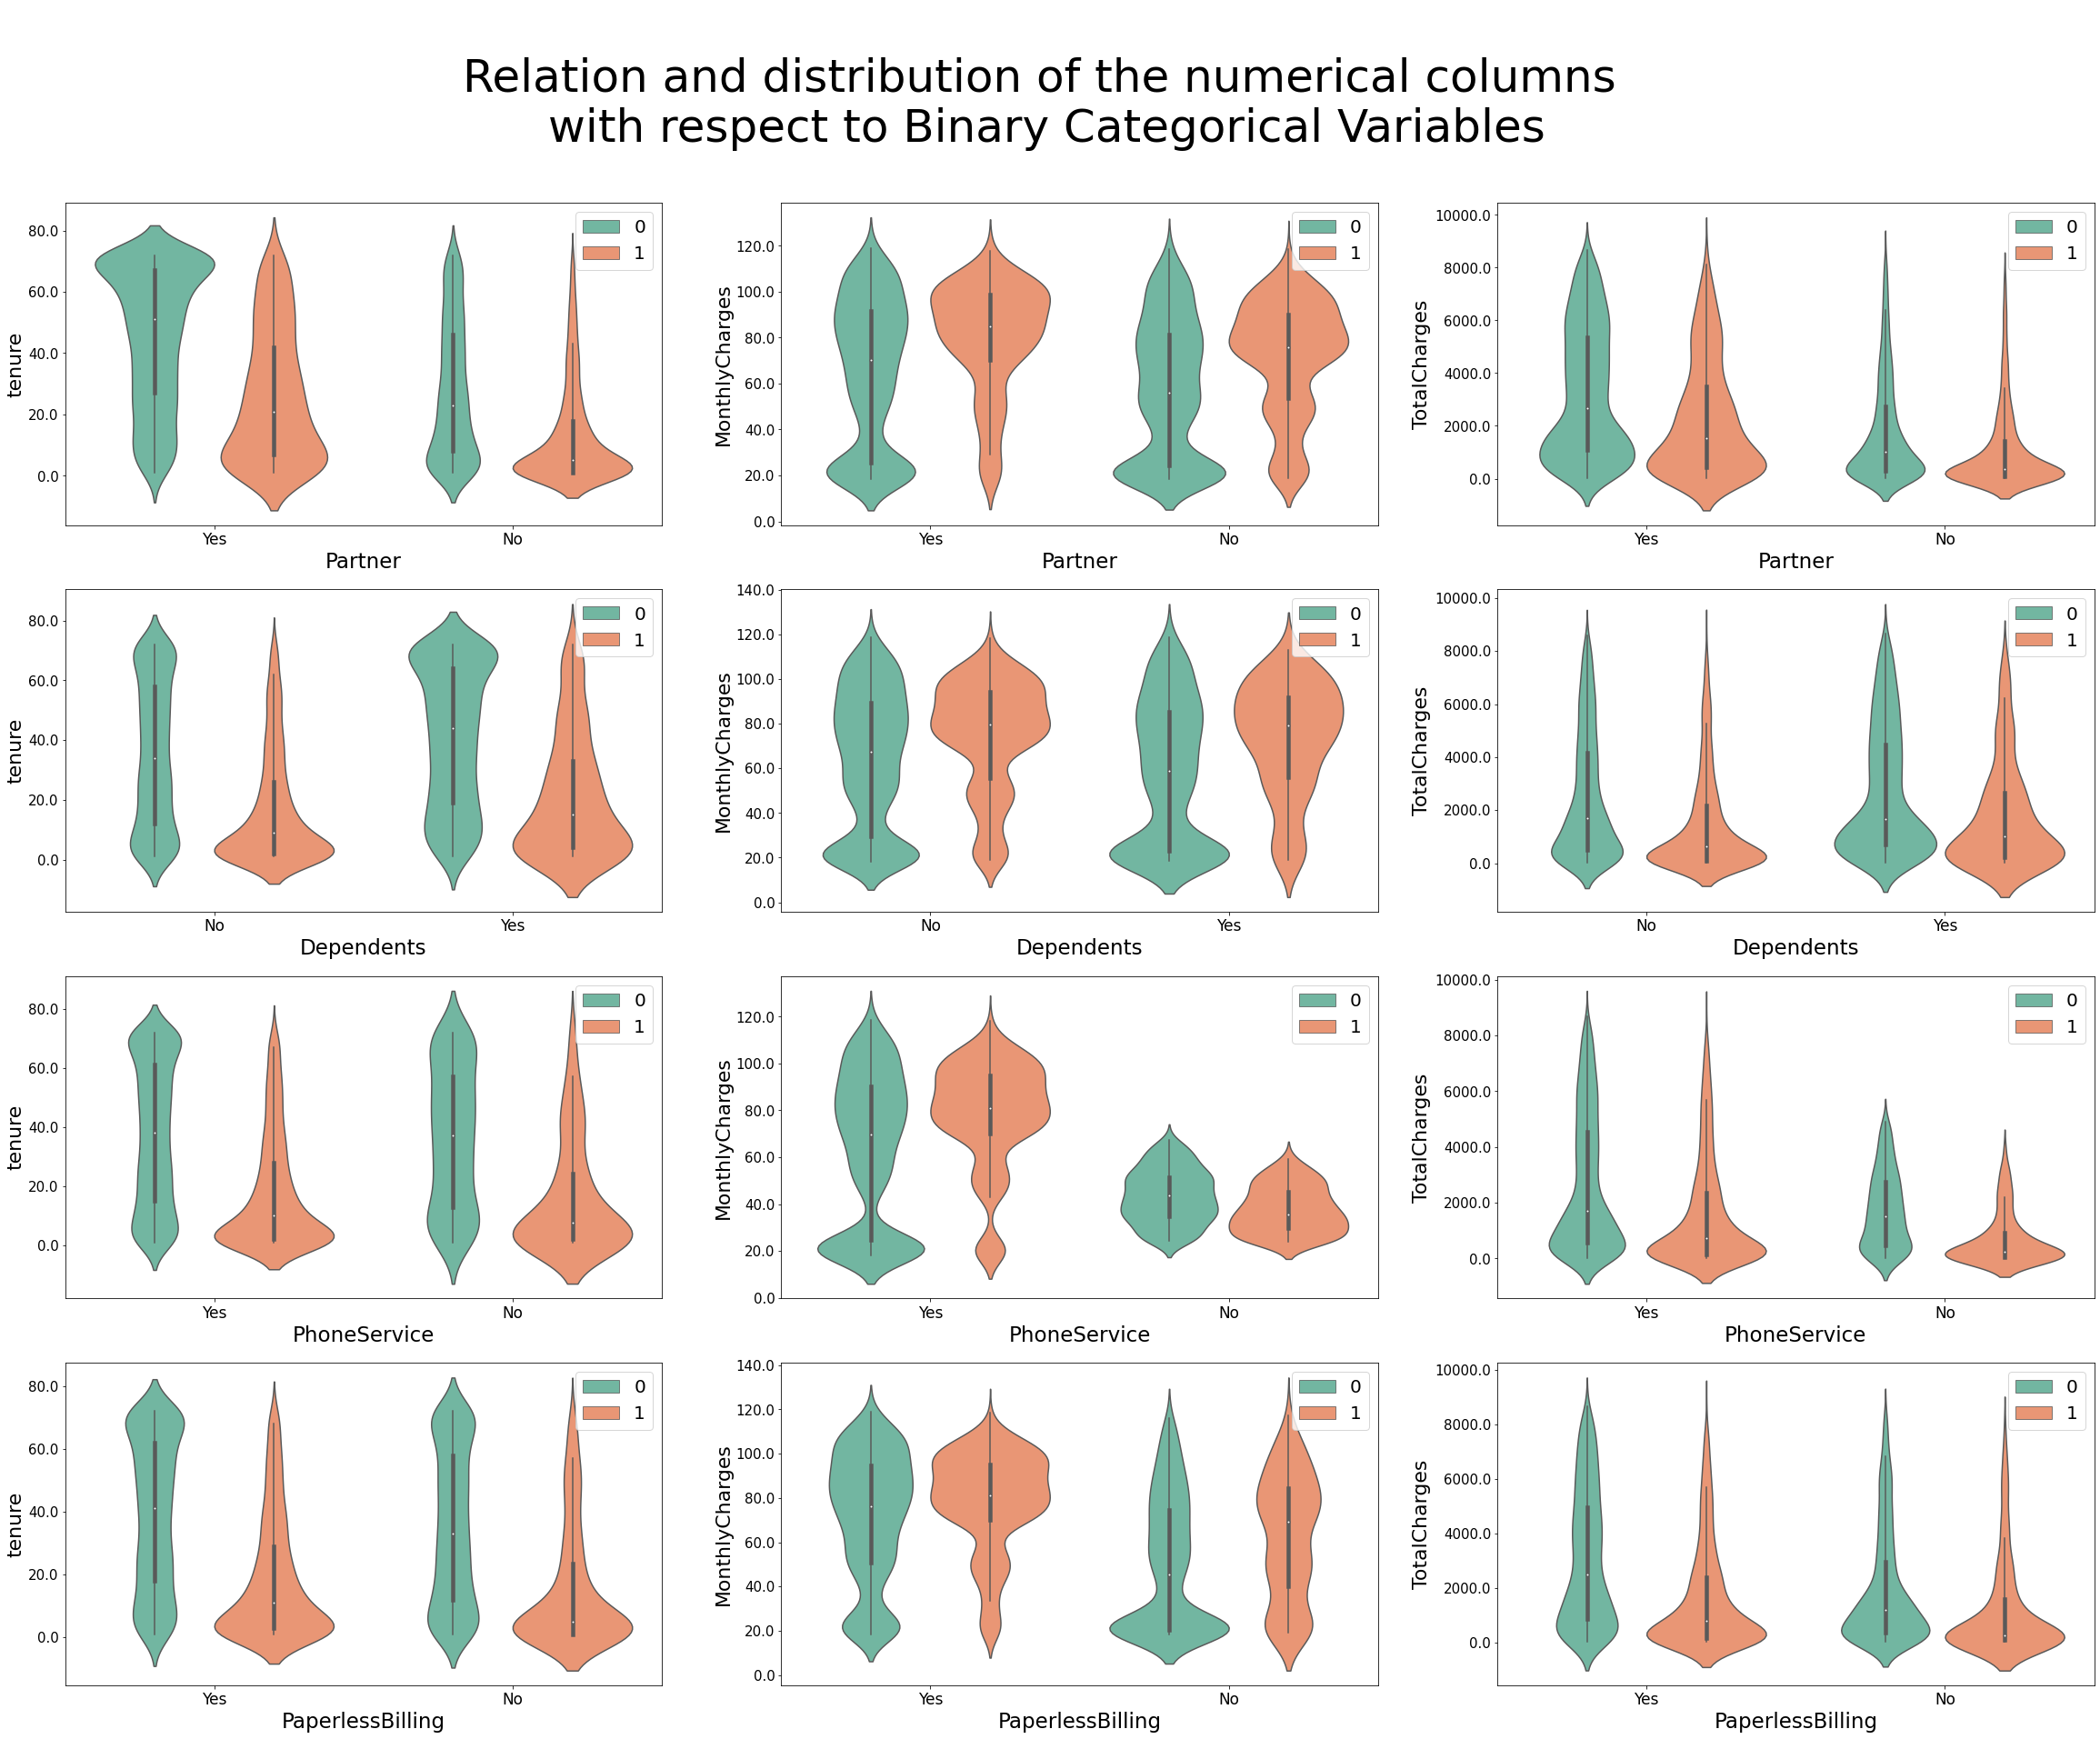

In [59]:
n_rows, n_cols = (4, 3)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 30))
figure.suptitle('\nRelation and distribution of the numerical columns \nwith respect to Binary Categorical Variables\n', fontsize=50)
# axes = axes.flatten()

for i, cat_cols in enumerate(binary_cats[:-1]):
    for j, num_cols in enumerate(numericals):
        fig = sns.violinplot(x=train_data[cat_cols], y=train_data[num_cols], ax=axes[i, j],
                        palette=sns.color_palette("Set2"), hue=train_data['churn'])
        axes[i, j].set_xlabel(cat_cols, fontsize=23)
        axes[i, j].set_ylabel(num_cols, fontsize=22)
        axes[i, j].legend(fontsize=20)
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), fontsize=17)
        axes[i, j].set_yticklabels(axes[i, j].get_yticks(), fontsize=15)

# show the plot
plt.show()

## Countplots (Ternary Categories)

Let's have a look at those ternary categories

In [60]:
print(ternary_cats)
print(len(ternary_cats))

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
9


In [61]:
# ternary_cats[:5]

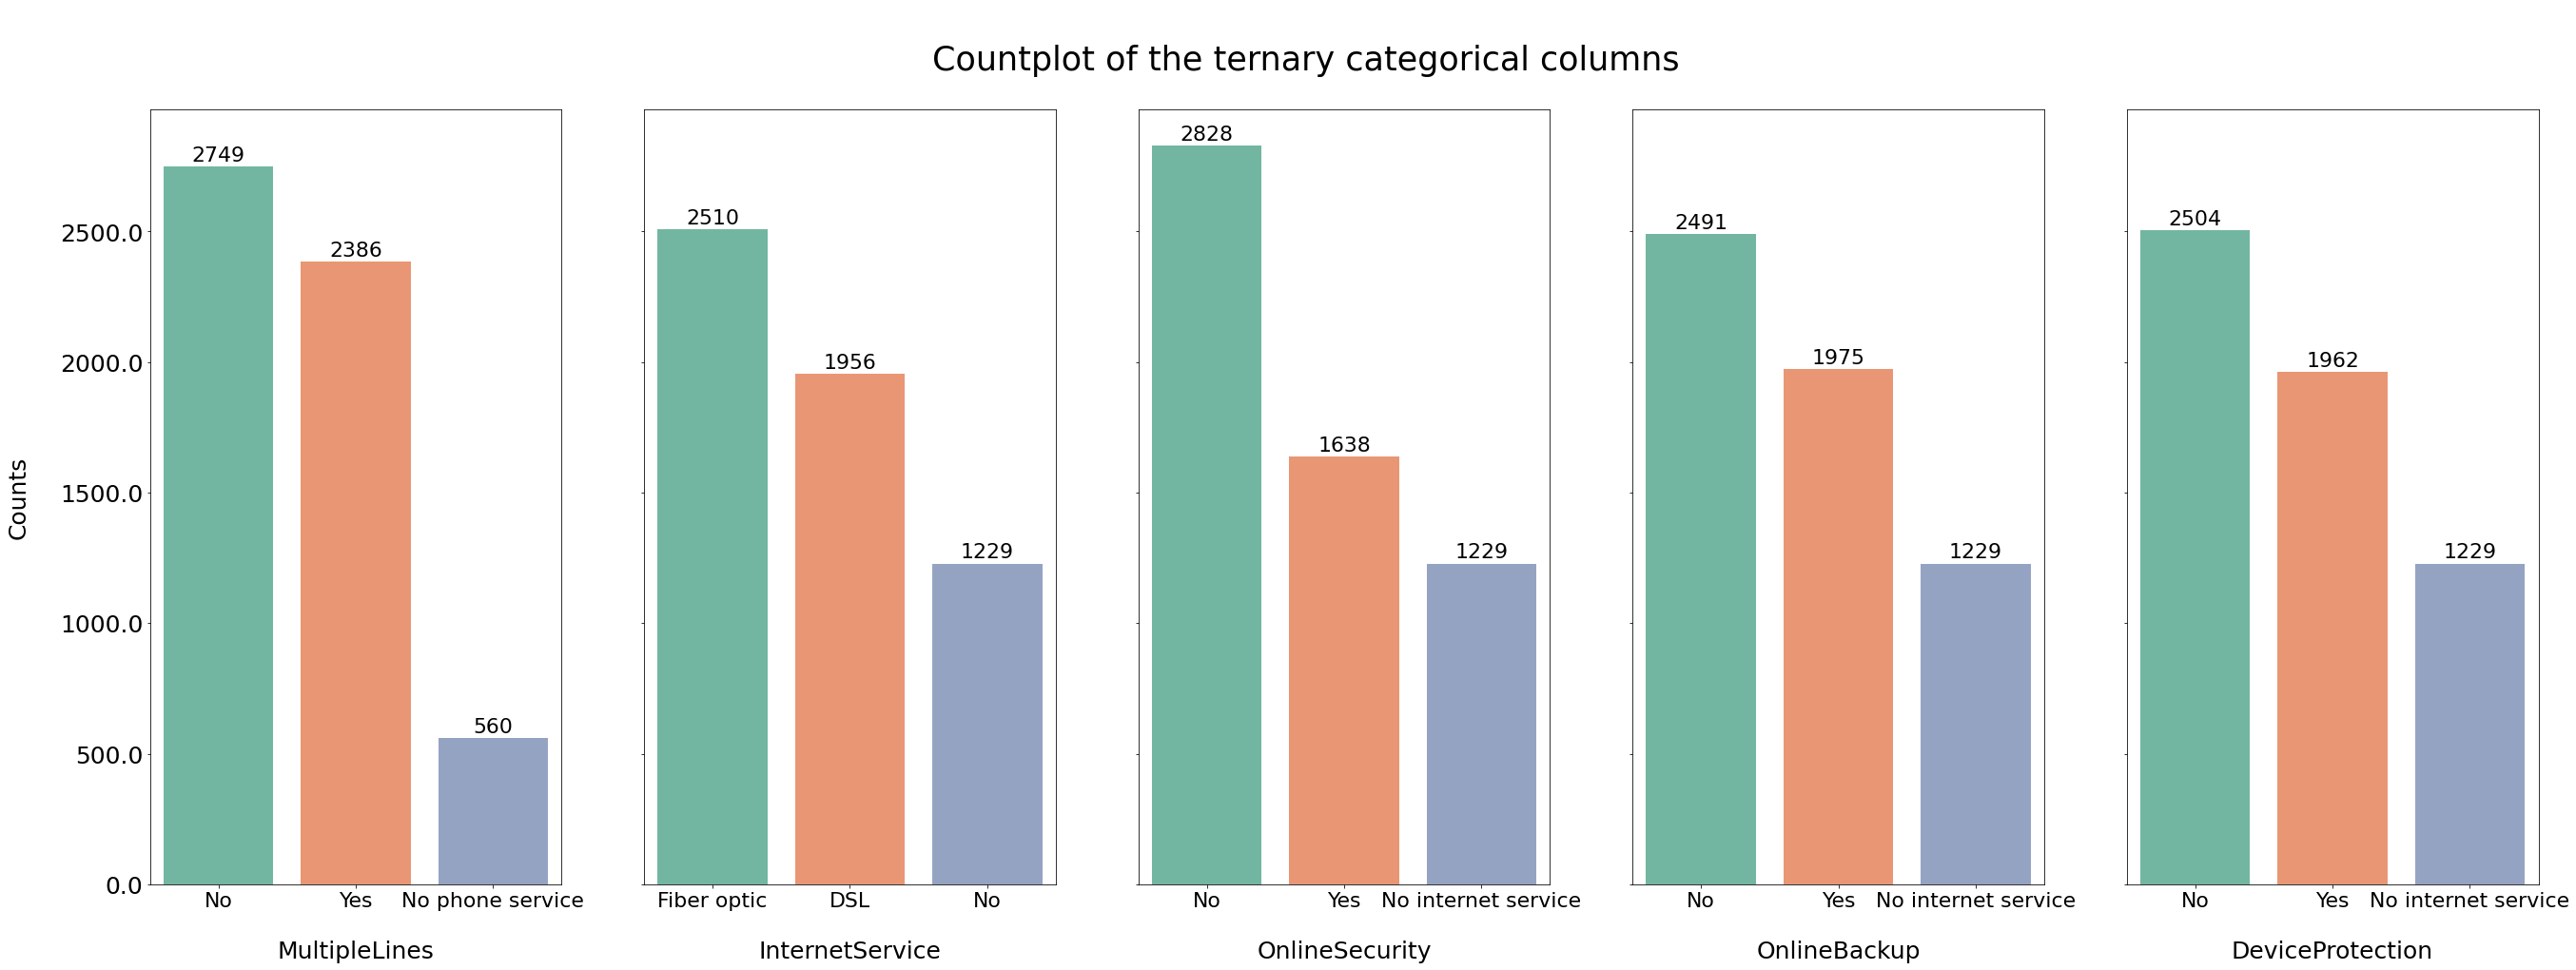

In [62]:

n_rows, n_cols = (1, 5)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 15), sharey=True)
figure.suptitle('\nCountplot of the ternary categorical columns\n\n', fontsize=35)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(ternary_cats[:5]):
    fig = sns.countplot(x=train_data[cols],
                        order=train_data[cols].value_counts(ascending=False).index,
                        ax=axes[j],
                        palette=sns.color_palette("Set2"), orient='v')
    axes[j].set_xlabel("\n" + cols, fontsize=25)
    axes[j].set_ylabel('', fontsize=20)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=22)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    fig.set_yticklabels(fig.get_yticks(), fontsize = 25)

    for p, val in zip(axes[j].patches, train_data[cols].value_counts(ascending=False)):
        axes[j].annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()+6.0),
                         xytext=(0, 4),
                         textcoords='offset points',
                         fontsize=22, ha='center')



axes[0].set_ylabel('Counts\n', fontsize=25)
# plt.tight_layout()
plt.show()

In [63]:
train_data['PhoneService'].value_counts()

Yes    5135
No      560
Name: PhoneService, dtype: int64

In [64]:
train_data.groupby('PhoneService')['MultipleLines'].value_counts()

PhoneService  MultipleLines   
No            No phone service     560
Yes           No                  2749
              Yes                 2386
Name: MultipleLines, dtype: int64

From the above figure, It's obvious that most of the **customer**  **don't** use ***MultipleLines*** (which means they use single line, more on this later), **uses** **Fiber optic** as their ***InternetService*** & **don't** have ***OnlineSecurity***, ***OnlineBackup*** & ***DeviceProtection***


>> **MulitpleLines** is related to the **PhoneService** feature, It is obvious from the groupby of the **PhoneService** column. **546** entries that don'e use **PhoneService** are also listed in **MulitpleLines** feature.

>> The **InternetService** column is also related to all the service that relies on Inerenet, so if **InternetService** = '**No**', all the other features shows that there are 'No Internet Service'. This is kinda messed up IMO, If a customer don't use InternetService he/she doesn't need those services related to the internet, so all those entries for the 'No internet Service' categoreis should be in the 'No' Category.

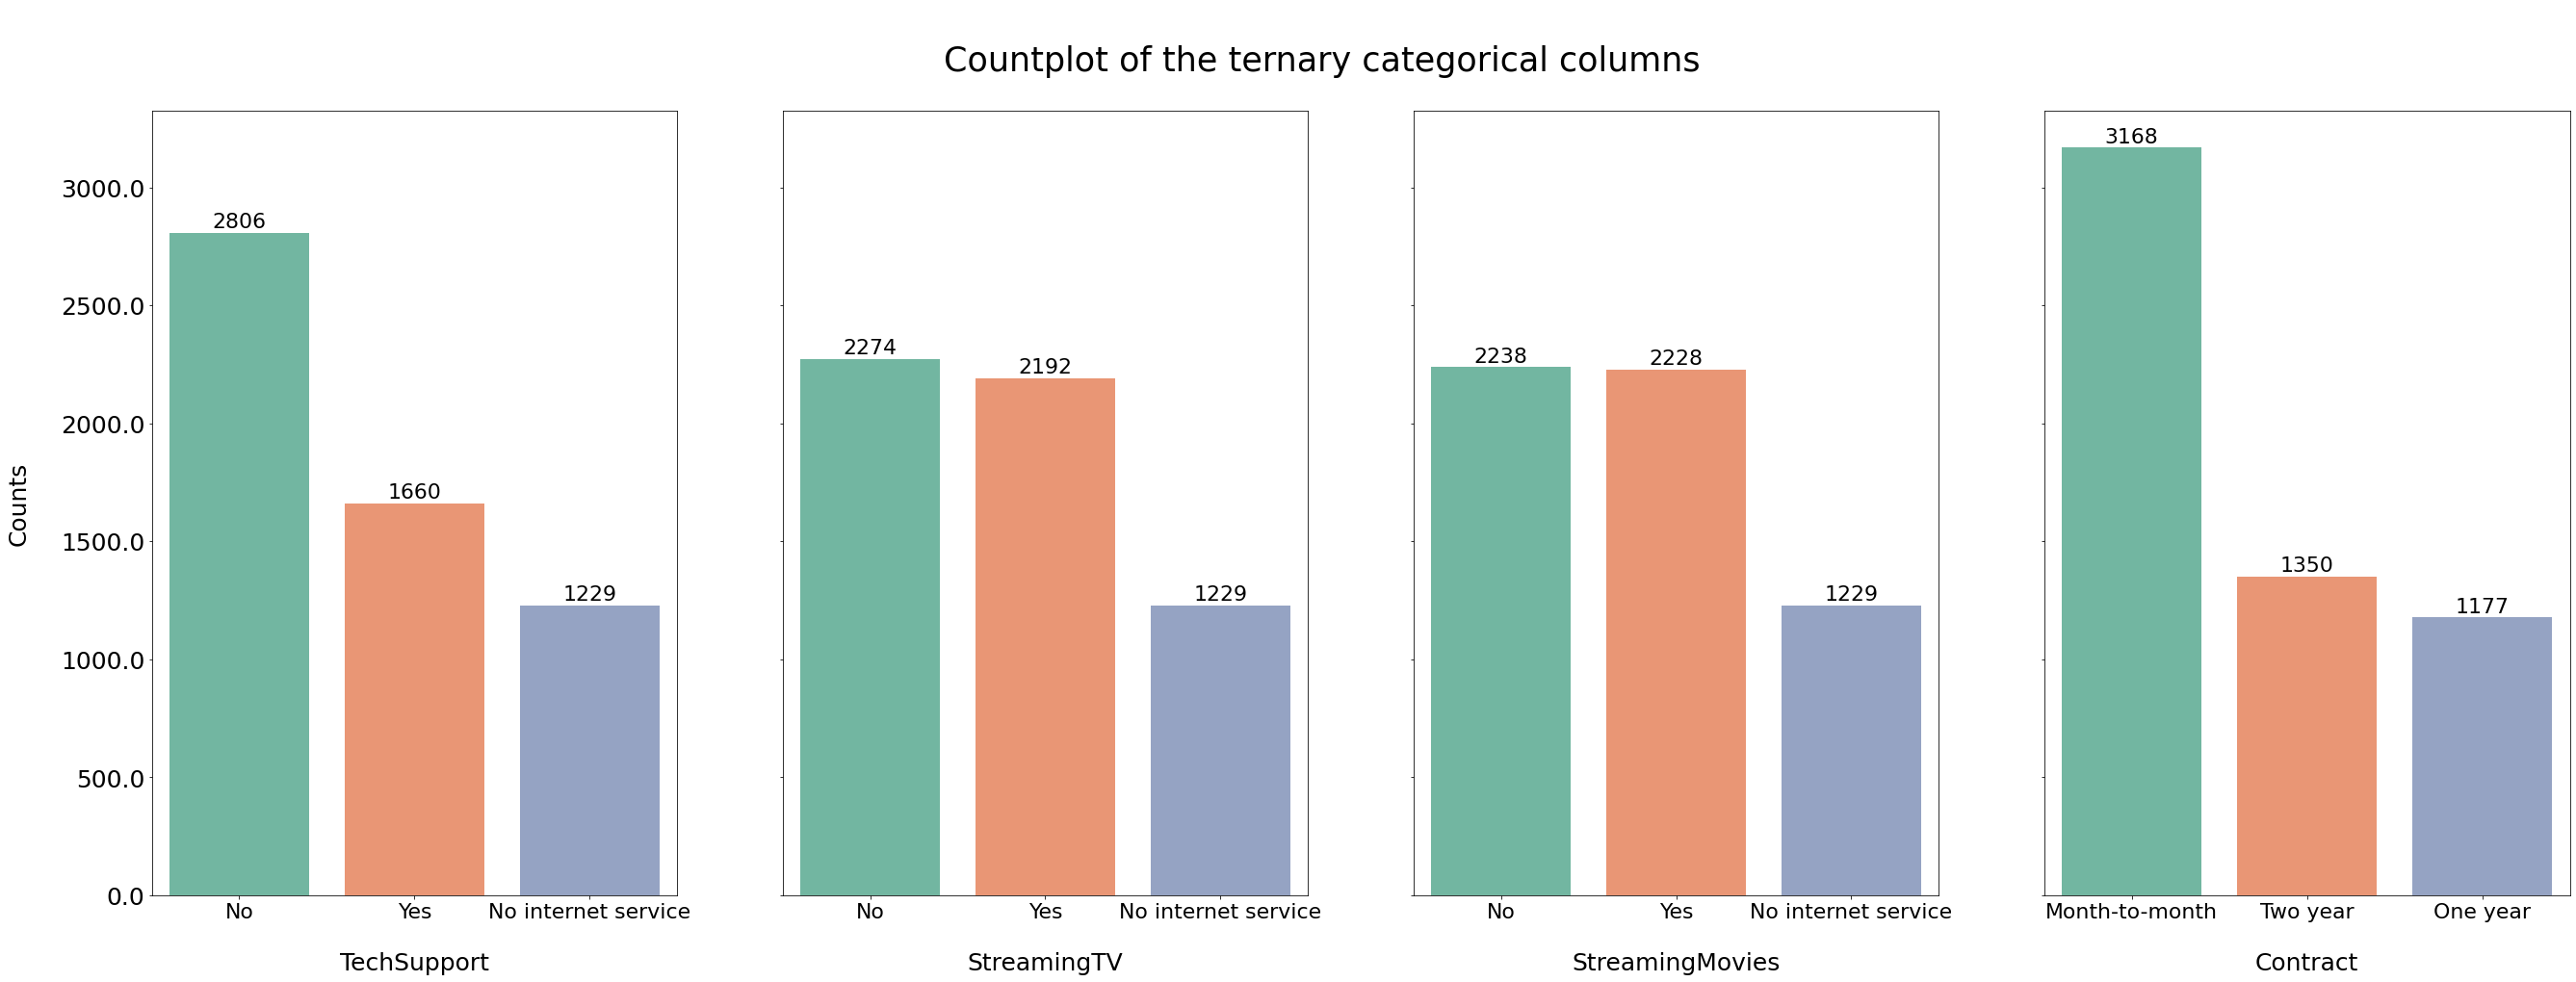

In [65]:

n_rows, n_cols = (1, 4)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 15), sharey=True)
figure.suptitle('\nCountplot of the ternary categorical columns\n\n', fontsize=35)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(ternary_cats[5:]):
    fig = sns.countplot(x=train_data[cols],
                        order=train_data[cols].value_counts(ascending=False).index,
                        ax=axes[j],
                        palette=sns.color_palette("Set2"), orient='v')
    axes[j].set_xlabel("\n" + cols, fontsize=25)
    axes[j].set_ylabel('', fontsize=20)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=22)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    fig.set_yticklabels(fig.get_yticks(), fontsize = 25)

    for p, val in zip(axes[j].patches, train_data[cols].value_counts(ascending=False)):
        axes[j].annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()+6.0),
                         xytext=(0, 4),
                         textcoords='offset points',
                         fontsize=22, ha='center')



axes[0].set_ylabel('Counts\n', fontsize=25)
# plt.tight_layout()
plt.show()

**Techsupport**, **StreamingTV**, **StreamingMovies** all uses the InternetService, so there are that one category with 'No Internet Service' which we talked earlier. Howerver, Most of the customer don't use **Techsupport**, for **StreamingTV** and **StreamingMovies** they are kinda same. So, it's like most of the customers who Streams TV also streams Movies, makes sense. 


Interesting thing is on the **Contract** feature. Most of the customers made a **Month-to-month** contract, while **One-year** contract being the least. Why **Month=to-month**? aret there trust issues, more like service issues with the company? Who knows, at least I don't. 

In [66]:
pd.pivot_table(
    data=train_data[train_data['InternetService'] == 'No'],
    index='churn',
    values=['InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'TechSupport'],
    aggfunc='count'
)

,DeviceProtection,InternetService,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTV,TechSupport
churn,,,,,,,
0,1133,1133,1133,1133,1133,1133,1133
1,96,96,96,96,96,96,96


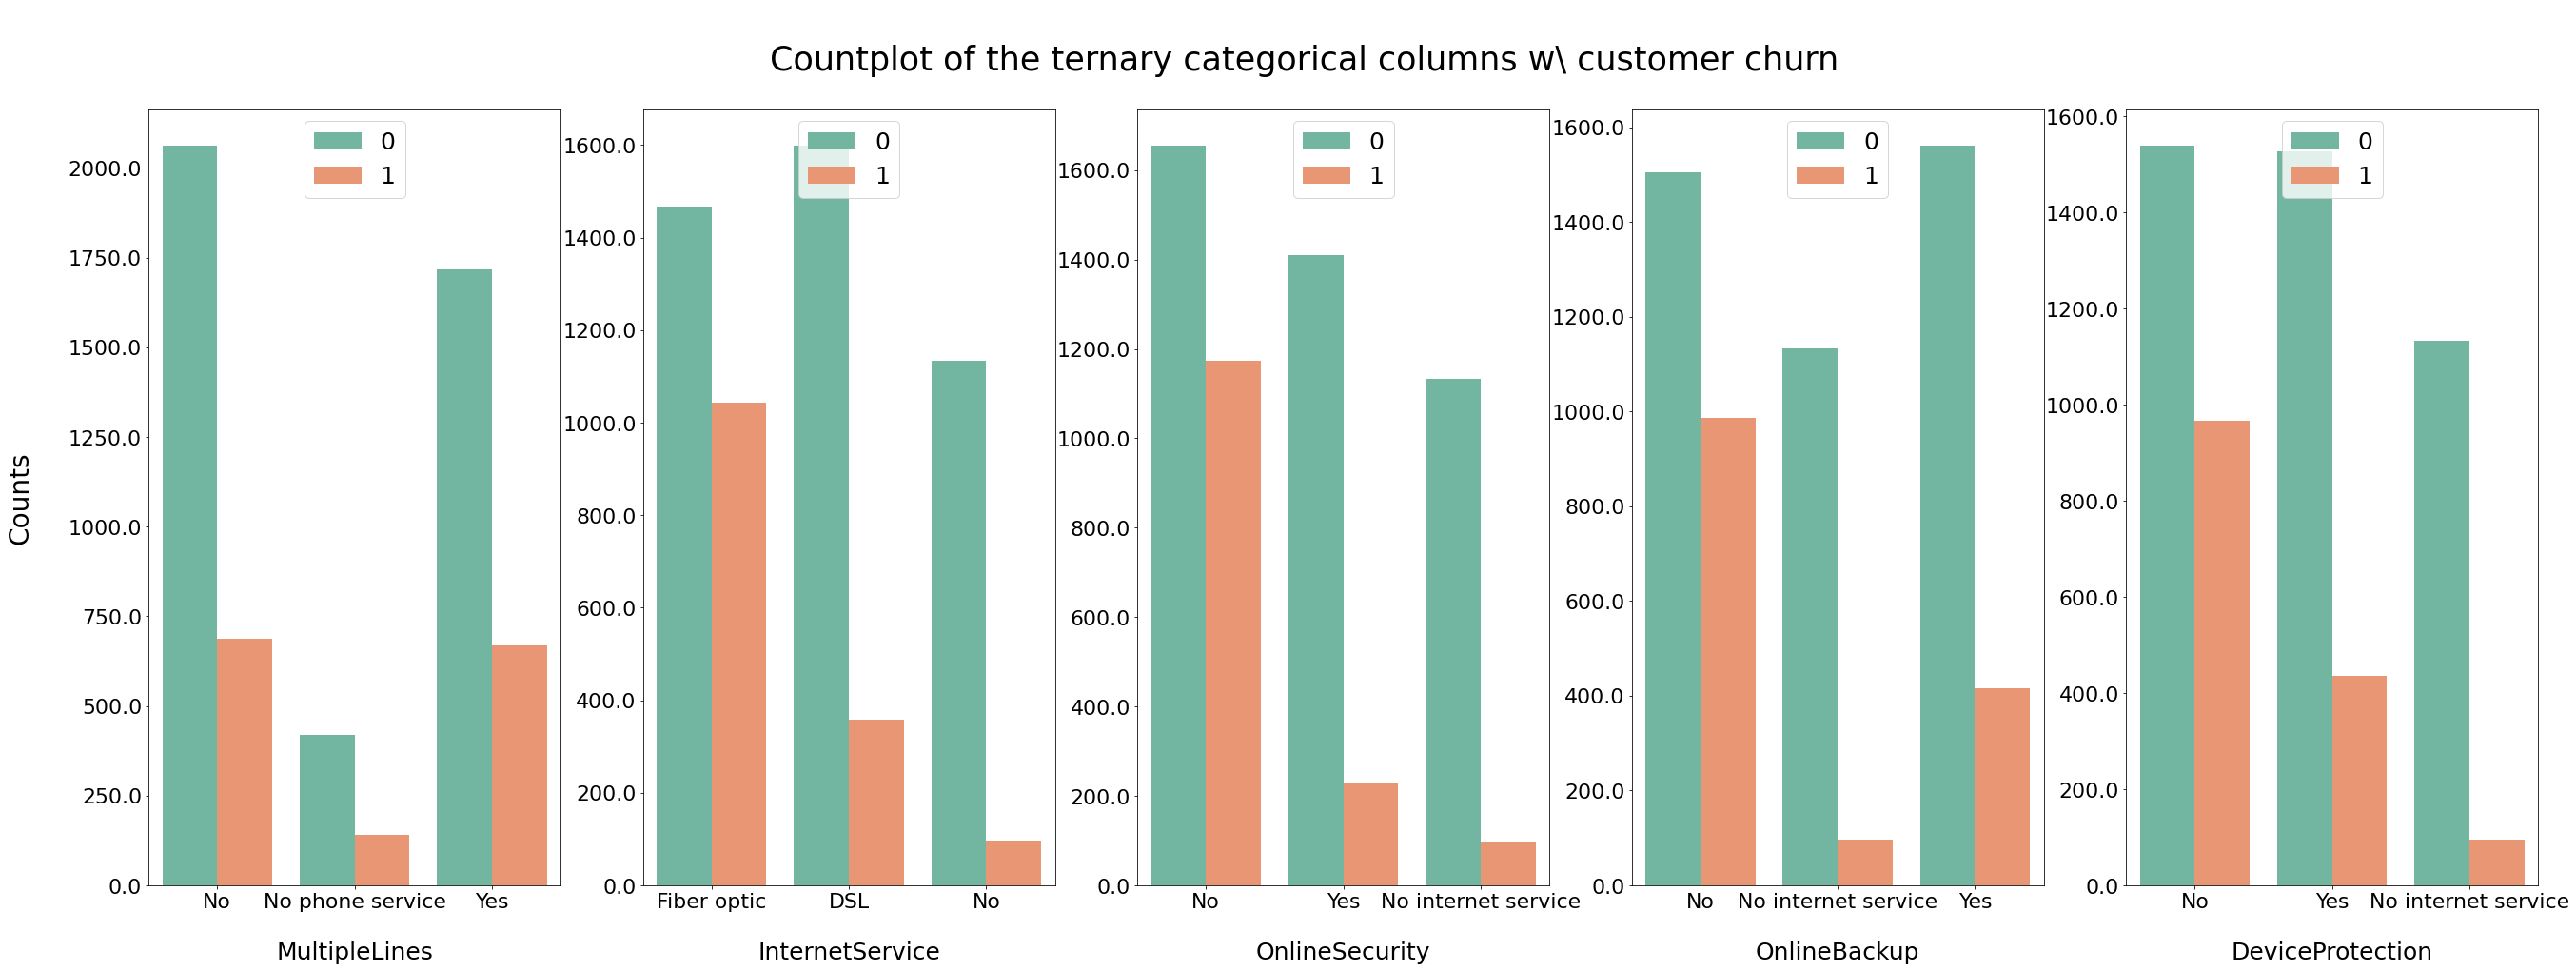

In [67]:

n_rows, n_cols = (1, 5)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 15), sharey=False)
figure.suptitle('\nCountplot of the ternary categorical columns w\ customer churn\n\n', fontsize=35)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(ternary_cats[:5]):
    fig = sns.countplot(x=train_data[cols],
                        hue=train_data['churn'],
                        ax=axes[j],
                        palette=sns.color_palette("Set2"), orient='v')
    axes[j].set_xlabel("\n" + cols, fontsize=25)
    axes[j].set_ylabel('', fontsize=20)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=22)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    fig.set_yticklabels(fig.get_yticks(), fontsize = 22)
    axes[j].legend(loc='upper center', fontsize=25)

    # for p, val in zip(axes[j].patches, train_data[cols].value_counts(ascending=False)):
    #     axes[j].annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()+6.0),
    #                      xytext=(0, 4),
    #                      textcoords='offset points',
    #                      fontsize=22, ha='center')



axes[0].set_ylabel('Counts\n', fontsize=28)
# plt.tight_layout()
plt.show()

In [68]:
for cols in ternary_cats[:5]:
    print(pd.pivot_table(
    data=train_data,
    index=cols,
    values='churn',
    aggfunc=['mean', 'sum']
))
    print("\n"+ "--" * 70 +"\n")

                      mean   sum
                     churn churn
MultipleLines                   
No                0.250273   688
No phone service  0.250000   140
Yes               0.280386   669

--------------------------------------------------------------------------------------------------------------------------------------------

                     mean   sum
                    churn churn
InternetService                
DSL              0.183027   358
Fiber optic      0.415538  1043
No               0.078112    96

--------------------------------------------------------------------------------------------------------------------------------------------

                         mean   sum
                        churn churn
OnlineSecurity                     
No                   0.415134  1174
No internet service  0.078112    96
Yes                  0.138584   227

-----------------------------------------------------------------------------------------------------------

There's not a lot of going on the **MulitpleLines** column, so let's not talk about it anymore.

**InternetService**: churn rate is high for the fiber optic line. Assuming the high price of the optical cable.

**OnlineSecurity**: churn rate is high with no OnlineSecurity

**OnlineBackup**: churn rate is high with no OnlineBackup.

**DeviceProtection**: churn rate is high with no DeviceProtection.

In [69]:
for cols in ternary_cats[2:5]:
    print("Category: ", cols)
    print("\n")

    print(pd.pivot_table(
        data=train_data,
        index=['InternetService', cols],
        values='churn',
        aggfunc=['mean', 'sum']
    ))
    print("\n"+ "--" * 70 +"\n")

Category:  OnlineSecurity


                                         mean   sum
                                        churn churn
InternetService OnlineSecurity                     
DSL             No                   0.272727   273
                Yes                  0.089005    85
Fiber optic     No                   0.493158   901
                Yes                  0.207906   142
No              No internet service  0.078112    96

--------------------------------------------------------------------------------------------------------------------------------------------

Category:  OnlineBackup


                                         mean   sum
                                        churn churn
InternetService OnlineBackup                       
DSL             No                   0.247911   267
                Yes                  0.103527    91
Fiber optic     No                   0.508487   719
                Yes                  0.295620   324
No              No inte

In [70]:
# train_data.groupby(['InternetService', 'OnlineSecurity'])['churn'].value_counts()

Although, most of the customers uses the DSL line but the churn rate of customers using fiber optic line and having OnlineSecurity is still higher than that of DSL connection with OnlineSecurity. 

>>> Having a Fiber Optic line for Internet connection makes people churn more than the DSL line


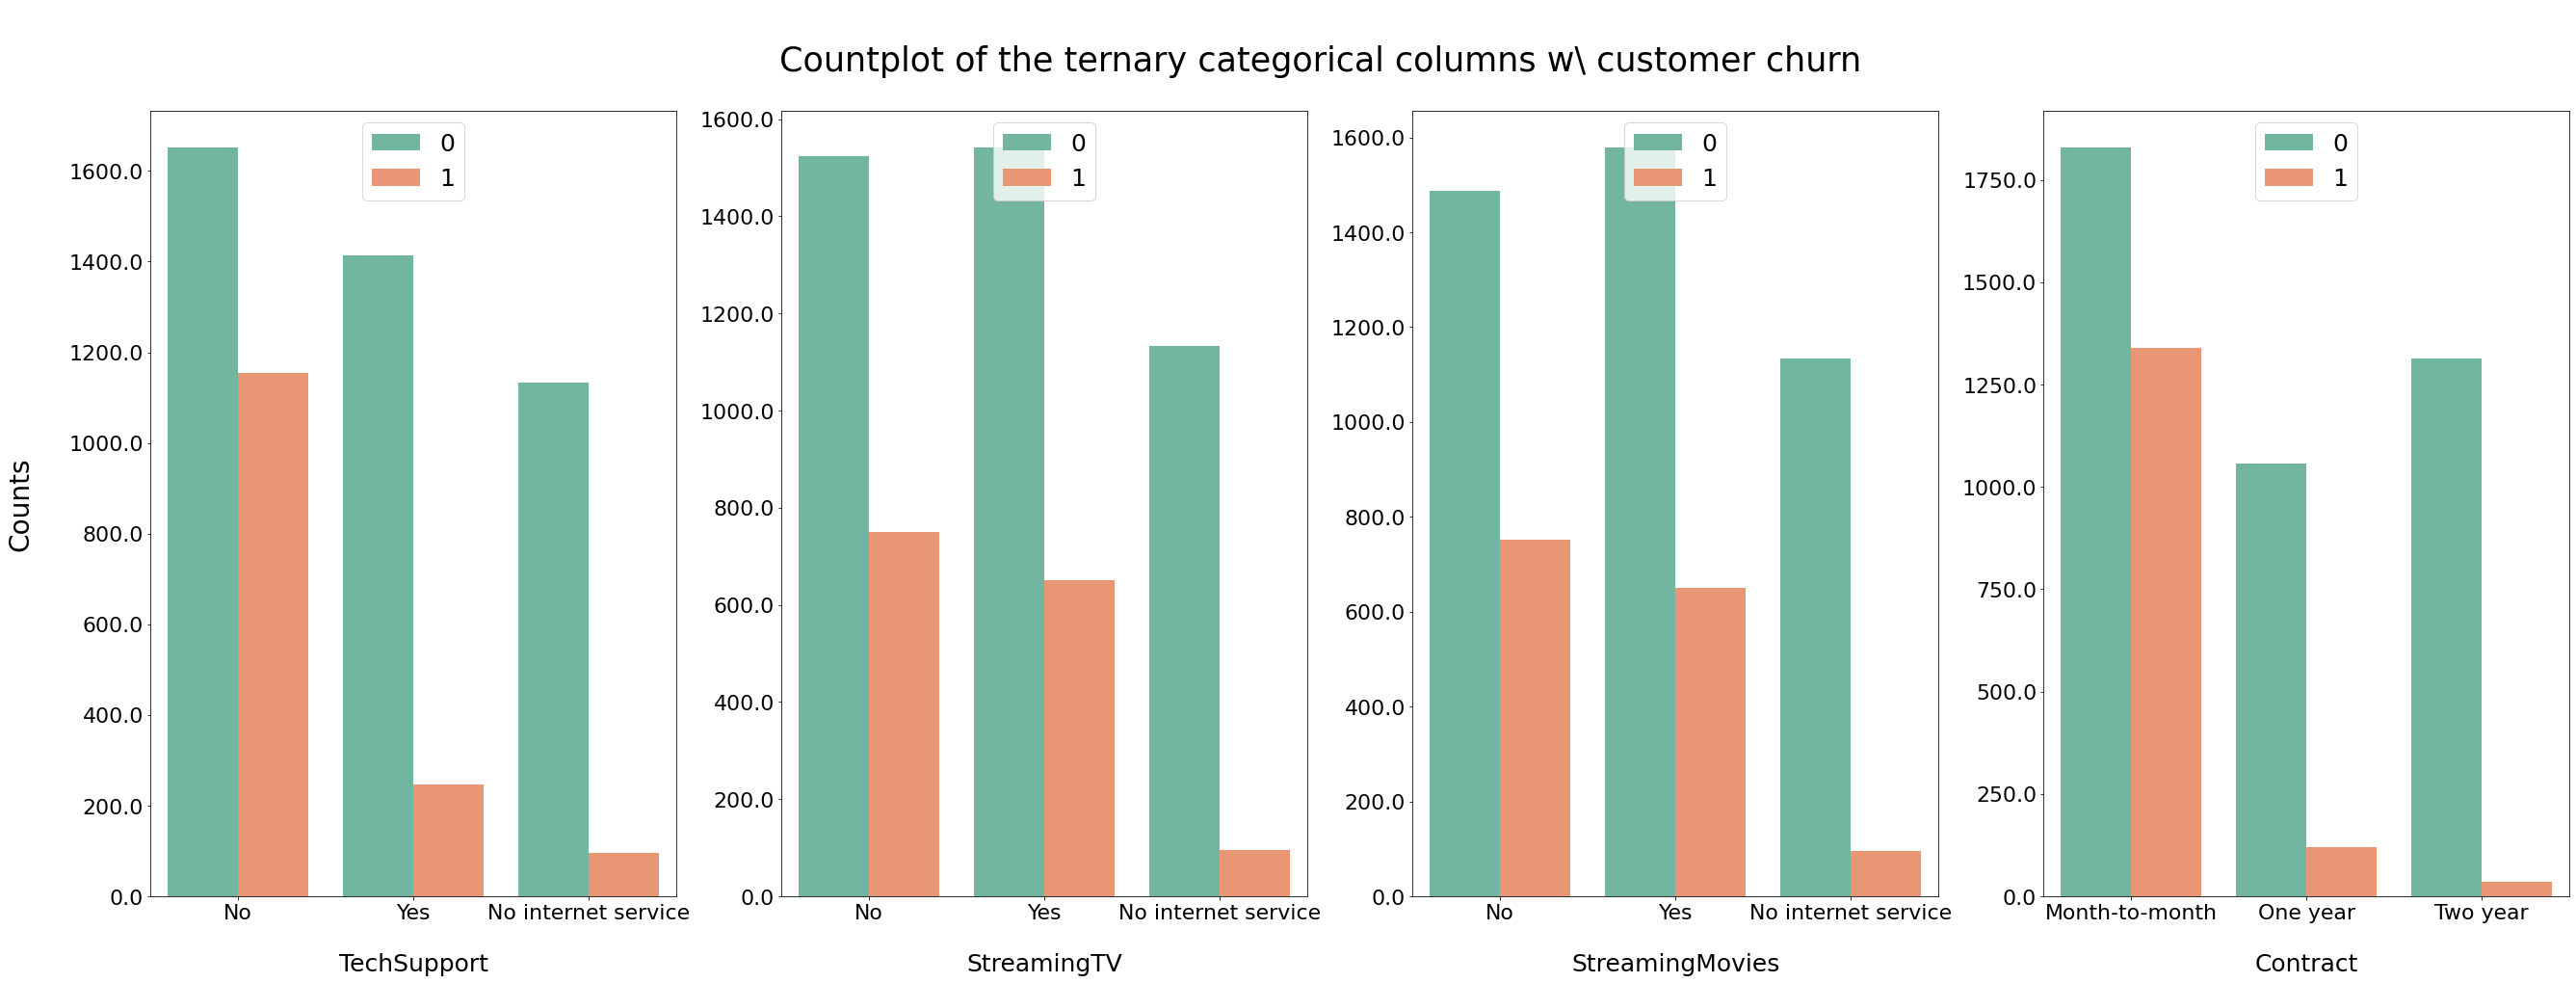

In [71]:

n_rows, n_cols = (1, 4)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 15), sharey=False)
figure.suptitle('\nCountplot of the ternary categorical columns w\ customer churn\n\n', fontsize=35)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(ternary_cats[5:]):
    fig = sns.countplot(x=train_data[cols],
                        hue=train_data['churn'],
                        ax=axes[j],
                        palette=sns.color_palette("Set2"), orient='v')
    axes[j].set_xlabel("\n" + cols, fontsize=25)
    axes[j].set_ylabel('', fontsize=20)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=22)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    fig.set_yticklabels(fig.get_yticks(), fontsize = 22)
    axes[j].legend(loc='upper center', fontsize=25)

    # for p, val in zip(axes[j].patches, train_data[cols].value_counts(ascending=False)):
    #     axes[j].annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()+6.0),
    #                      xytext=(0, 4),
    #                      textcoords='offset points',
    #                      fontsize=22, ha='center')



axes[0].set_ylabel('Counts\n', fontsize=28)
# plt.tight_layout()
plt.show()

In [72]:
for cols in ternary_cats[6:]:
    print("Category: ", cols)
    print("\n")

    print(pd.pivot_table(
        data=train_data,
        index=['InternetService', cols],
        values='churn',
        aggfunc=['mean', 'sum']
    ))
    print("\n"+ "--" * 70 +"\n")

Category:  StreamingTV


                                         mean   sum
                                        churn churn
InternetService StreamingTV                        
DSL             No                   0.214585   256
                Yes                  0.133683   102
Fiber optic     No                   0.456984   494
                Yes                  0.384185   549
No              No internet service  0.078112    96

--------------------------------------------------------------------------------------------------------------------------------------------

Category:  StreamingMovies


                                         mean   sum
                                        churn churn
InternetService StreamingMovies                    
DSL             No                   0.219512   252
                Yes                  0.131188   106
Fiber optic     No                   0.457798   499
                Yes                  0.383099   544
No              No inte

Woah, look at that last relation of **InternetService** with the **Contract**, look at those churn rate for the fiber opic connections **(huge)**. 

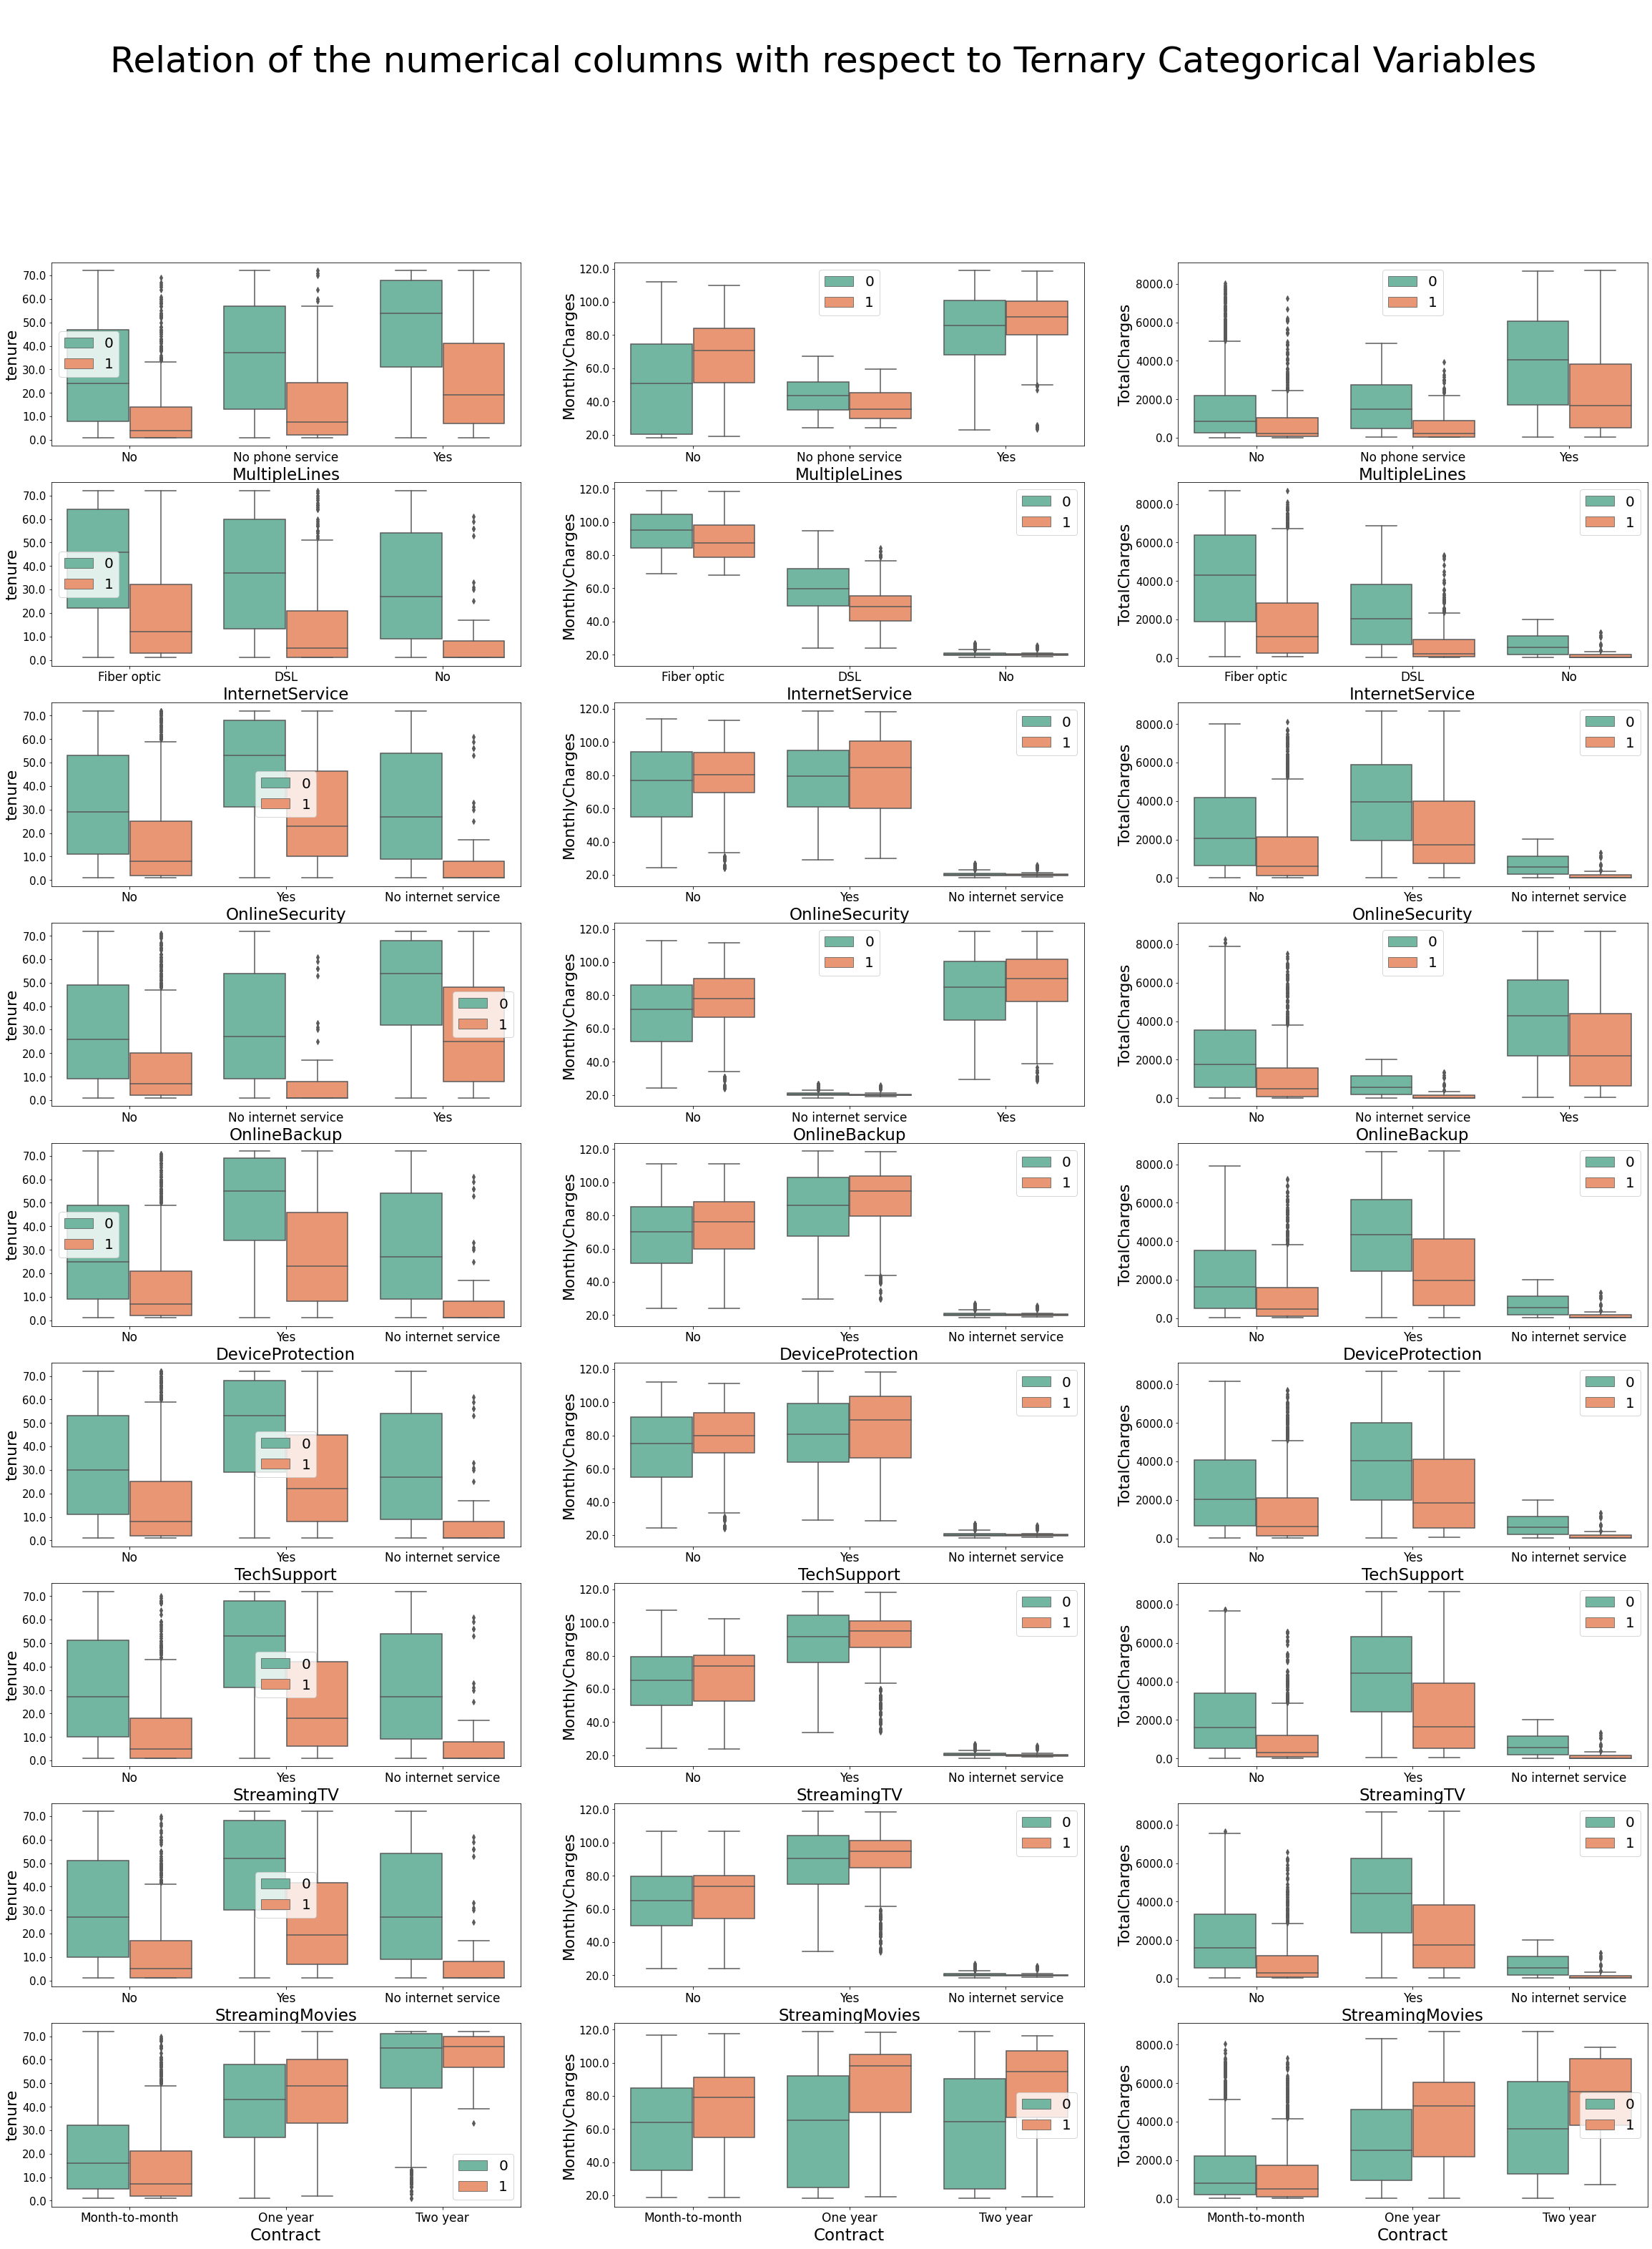

In [73]:
n_rows, n_cols = (9, 3)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 50))
figure.suptitle('\nRelation of the numerical columns with respect to Ternary Categorical Variables', fontsize=50)
# axes = axes.flatten()

for i, cat_cols in enumerate(ternary_cats):
    for j, num_cols in enumerate(numericals):
        fig = sns.boxplot(x=train_data[cat_cols], y=train_data[num_cols], ax=axes[i, j],
                        palette=sns.color_palette("Set2"), hue=train_data['churn'],)
        axes[i, j].set_xlabel(cat_cols, fontsize=23)
        axes[i, j].set_ylabel(num_cols, fontsize=22)
        axes[i, j].legend(fontsize=20)
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), fontsize=17)
        axes[i, j].set_yticklabels(axes[i, j].get_yticks(), fontsize=15)

# show the plot
plt.show()

In [74]:
for cols in ternary_cats:
    print("Category: " + cols + "\n" + "--" * 70)

    print(pd.pivot_table(
        data=train_data,
        index='churn',
        columns=[cols],
        values=['tenure', 'MonthlyCharges', 'TotalCharges'],
        aggfunc=['mean']
    ))
    print("\n" + "--" * 70)

Category: MultipleLines
--------------------------------------------------------------------------------------------------------------------------------------------
                        mean                                           \
              MonthlyCharges                             TotalCharges   
MultipleLines             No No phone service        Yes           No   
churn                                                                   
0                  50.032533        43.374881  79.630868  1531.985492   
1                  67.205596        37.553214  89.111211   792.188154   

                                                                         \
                                                tenure                    
MultipleLines No phone service          Yes         No No phone service   
churn                                                                     
0                  1732.385952  3991.230810  28.422125        36.295238   
1                   6

In [75]:
# ternary_cats

In [76]:
# pd.pivot_table(
#     data=train_data[train_data['InternetService'] == 'Fiber optic'],
#     index=['OnlineSecurity', 'OnlineBackup', 'TechSupport'],
#     values='MonthlyCharges',
#     aggfunc='mean'
# )

In [77]:
pd.pivot_table(
    data=train_data[(train_data.loc[:, [cols for cols in ternary_cats]]['InternetService'] == 'Fiber optic')],
    index=['OnlineBackup', 'OnlineSecurity', 'TechSupport', 'DeviceProtection', 'StreamingMovies', 'StreamingTV'],
    values=['churn', 'MonthlyCharges', 'tenure'],
    aggfunc=['mean', 'sum', 'count']
    )

mean  \
                                                                                     MonthlyCharges   
OnlineBackup OnlineSecurity TechSupport DeviceProtection StreamingMovies StreamingTV                  
No           No             No          No               No              No               72.060681   
                                                                         Yes              82.072727   
                                                         Yes             No               82.798661   
                                                                         Yes              93.041667   
                                        Yes              No              No               77.420968   
...                                                                                             ...   
Yes          Yes            Yes         No               Yes             Yes             108.195833   
                                        Yes              No              No               94.577273   
                                                                         Yes             103.721429   
                                                         Yes             No              105.236364   
                                                                         Yes             114.179508   

                                                                                                \
                                                                                         churn   
OnlineBackup OnlineSecurity TechSupport DeviceProtection StreamingMovies StreamingTV             
No           No             No          No               No              No           0.609907   
                                                                         Yes          0.663636   
                                                         Yes             No           0.660714   
                                                                         Yes          0.630435   
                                        Yes              No              No           0.483871   
...                                                                                        ...   
Yes          Yes            Yes         No               Yes             Yes          0.250000   
                                        Yes              No              No           0.090909   
                                                                         Yes          0.071429   
                                                         Yes             No           0.000000   
                                                                         Yes          0.073770   

                                                                                                 \
                                                                                         tenure   
OnlineBackup OnlineSecurity TechSupport DeviceProtection StreamingMovies StreamingTV              
No           No             No          No               No              No           11.114551   
                                                                         Yes          12.618182   
                                                         Yes             No           15.330357   
                                                                         Yes          19.594203   
                                        Yes              No              No           17.338710   
...                                                                                         ...   
Yes          Yes            Yes         No               Yes             Yes          55.333333   
                                        Yes              No              No           62.454545   
                                                                         Yes          60.000000   
                                                         Yes             No           64.45

>>> So, when people use the Fiber optic connection and availing all the Internet related services tend to churn less and stays more times by average even with the high monthly charges. 

In [78]:
pd.pivot_table(
    data=train_data[(train_data.loc[:, [cols for cols in ternary_cats]]['InternetService'] == 'DSL')],
    index=['OnlineBackup', 'OnlineSecurity', 'TechSupport', 'DeviceProtection', 'StreamingMovies', 'StreamingTV'],
    values=['churn', 'MonthlyCharges', 'tenure'],
    aggfunc=['mean', 'sum', 'count']
    )

mean  \
                                                                                     MonthlyCharges   
OnlineBackup OnlineSecurity TechSupport DeviceProtection StreamingMovies StreamingTV                  
No           No             No          No               No              No               39.992227   
                                                                         Yes              50.119697   
                                                         Yes             No               46.677027   
                                                                         Yes              52.845000   
                                        Yes              No              No               46.172727   
...                                                                                             ...   
Yes          Yes            Yes         No               Yes             Yes              78.700000   
                                        Yes              No              No               64.140541   
                                                                         Yes              73.844231   
                                                         Yes             No               74.082143   
                                                                         Yes              84.222458   

                                                                                                \
                                                                                         churn   
OnlineBackup OnlineSecurity TechSupport DeviceProtection StreamingMovies StreamingTV             
No           No             No          No               No              No           0.390756   
                                                                         Yes          0.515152   
                                                         Yes             No           0.567568   
                                                                         Yes          0.366667   
                                        Yes              No              No           0.363636   
...                                                                                        ...   
Yes          Yes            Yes         No               Yes             Yes          0.052632   
                                        Yes              No              No           0.027027   
                                                                         Yes          0.076923   
                                                         Yes             No           0.071429   
                                                                         Yes          0.000000   

                                                                                                 \
                                                                                         tenure   
OnlineBackup OnlineSecurity TechSupport DeviceProtection StreamingMovies StreamingTV              
No           No             No          No               No              No            8.609244   
                                                                         Yes          10.969697   
                                                         Yes             No           10.135135   
                                                                         Yes          20.633333   
                                        Yes              No              No           21.363636   
...                                                                                         ...   
Yes          Yes            Yes         No               Yes             Yes          52.789474   
                                        Yes              No              No           56.621622   
                                                                         Yes          52.384615   
                                                         Yes             No           54.61

>>> Same case also with the DSL connection, although the churn rate is less than that of the FIber optic connection. And also the cost per month is less too.

In [79]:
multiple_cats

['PaymentMethod']

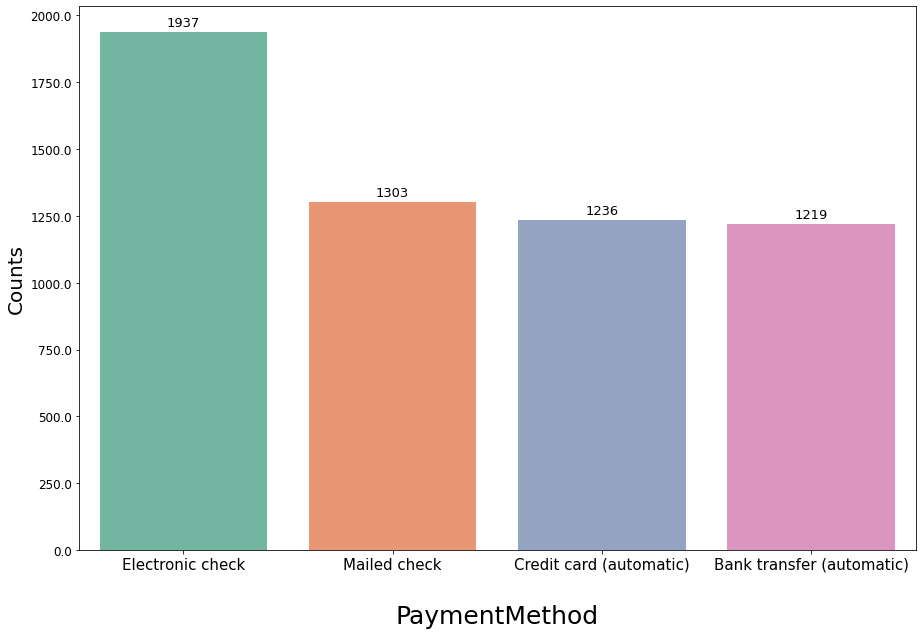

In [80]:
plt.figure(figsize=(15, 10))

fig = sns.countplot(x=train_data['PaymentMethod'],
                    order=train_data['PaymentMethod'].value_counts(ascending=False).index,
                    palette=sns.color_palette("Set2"))
fig.set_xlabel("\nPaymentMethod", fontsize=25)
fig.set_ylabel('Counts', fontsize=20)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15)
# fig.set_xticklabels(fig.get_xticks(), size = 15)
fig.set_yticklabels(fig.get_yticks(), fontsize=12)

for p, val in zip(fig.patches, train_data['PaymentMethod'].value_counts(ascending=False)):
    fig.annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()+6.0),
                        xytext=(0, 4),
                        textcoords='offset points',
                        fontsize=13, ha='center')


plt.show()

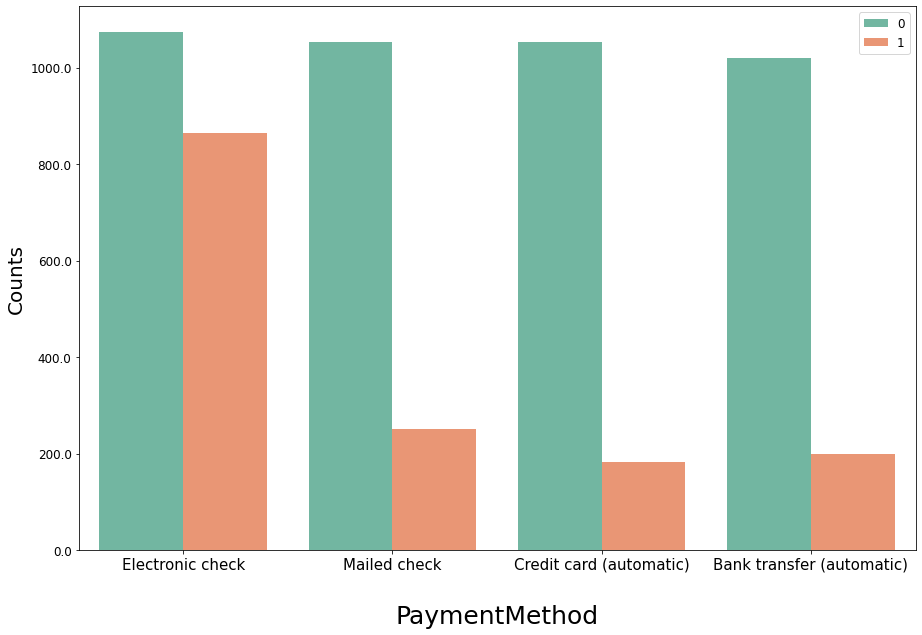

In [81]:
plt.figure(figsize=(15, 10))

fig = sns.countplot(x=train_data['PaymentMethod'],
                    order=train_data['PaymentMethod'].value_counts(ascending=False).index,
                    palette=sns.color_palette("Set2"),
                    hue=train_data['churn'])
fig.set_xlabel("\nPaymentMethod", fontsize=25)
fig.set_ylabel('Counts', fontsize=20)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15)
# fig.set_xticklabels(fig.get_xticks(), size = 15)
fig.set_yticklabels(fig.get_yticks(), fontsize=12)
fig.legend(fontsize=12)
# for p, val in zip(fig.patches, train_data['PaymentMethod'].value_counts(ascending=False)):
#     fig.annotate(val, (p.get_x() + p.get_width() / 2, p.get_height()+6.0),
#                         xytext=(0, 4),
#                         textcoords='offset points',
#                         fontsize=13, ha='center')


plt.show()

In [82]:
pd.pivot_table(
    data=train_data,
    index='PaymentMethod',
    values='churn',
    aggfunc=['mean', 'sum', 'count']
)

,mean,sum,count
,churn,churn,churn
PaymentMethod,,,
Bank transfer (automatic),0.164069,200,1219
Credit card (automatic),0.148058,183,1236
Electronic check,0.446051,864,1937
Mailed check,0.191865,250,1303


In [83]:
pd.pivot_table(
    data=train_data,
    index='PaymentMethod',
    values=['tenure', 'MonthlyCharges', 'TotalCharges'],
    aggfunc=['mean', 'count']
)

mean                          \
                          MonthlyCharges TotalCharges     tenure   
PaymentMethod                                                      
Bank transfer (automatic)      67.206932  3071.319729  43.331419   
Credit card (automatic)        66.737540  3088.594377  43.216019   
Electronic check               76.357253  2096.881440  25.191017   
Mailed check                   43.633269  1032.143438  21.666922   

                                   count                      
                          MonthlyCharges TotalCharges tenure  
PaymentMethod                                                 
Bank transfer (automatic)           1219         1219   1219  
Credit card (automatic)             1236         1236   1236  
Electronic check                    1937         1937   1937  
Mailed check                        1303         1303   1303

# Model Training

In [150]:
X_train.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4123,Female,0,No,No,10,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374.00
3095,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),94.45,5073.10
2824,Male,1,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,560.85
4000,Male,0,Yes,No,55,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.70,1443.65
3622,Male,0,No,No,9,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,69.50,653.25
4751,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.95,78.95
6883,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65
2026,Female,0,Yes,Yes,5,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.05,125.50
760,Male,0,Yes,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,208.85
3540,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,83.20,6126.10


In [130]:
from sklearn.preprocessing import StandardScaler

In [156]:
numeric_train_cols = X_train.copy().drop('SeniorCitizen', axis=1).select_dtypes(include=[np.number]).columns
numeric_train = X_train.copy()[numeric_train_cols]

numeric_test_cols = X_test.copy().drop('SeniorCitizen', axis=1).select_dtypes(include=[np.number]).columns
numeric_test = X_test.copy()[numeric_test_cols]

numeric_val_cols = X_val.copy().drop('SeniorCitizen', axis=1).select_dtypes(include=[np.number]).columns
numeric_val = X_val.copy()[numeric_val_cols]

scaler = StandardScaler()   # instantiate the StandardScaler

# for training data
scaled_numeric_train = scaler.fit_transform(numeric_train.astype(np.float64))
scaled_numeric_train = pd.DataFrame(scaled_numeric_train, columns=numeric_train_cols)

# for test data
scaled_numeric_test = scaler.transform(numeric_test.astype(np.float64))
scaled_numeric_test = pd.DataFrame(scaled_numeric_test, columns=numeric_test_cols)

# for validatio data
scaled_numeric_val = scaler.transform(numeric_val.astype(np.float64))
scaled_numeric_val = pd.DataFrame(scaled_numeric_val, columns=numeric_val_cols)

# create the non numeric dataframe to hold the non numeric columusn for train, test and validation
non_numeric_train = X_train[binary_cats + ternary_cats + multiple_cats + ['gender']].copy()
non_numeric_test = X_test[binary_cats + ternary_cats + multiple_cats + ['gender']].copy()
non_numeric_val = X_val[binary_cats + ternary_cats + multiple_cats + ['gender']].copy()


# for training ddata
scaled_train = pd.concat([scaled_numeric_train.reset_index(drop=True), 
                         non_numeric_train.reset_index(drop=True)], axis=1)

scaled_test = pd.concat([scaled_numeric_test.reset_index(drop=True), 
                         non_numeric_test.reset_index(drop=True)], axis=1)

scaled_val = pd.concat([scaled_numeric_val.reset_index(drop=True), 
                         non_numeric_val.reset_index(drop=True)], axis=1)

In [160]:
print("X train", scaled_train.isna().sum().sum())
print("X test", scaled_test.isna().sum().sum())
print("X val", scaled_val.isna().sum().sum())


X train 0
X test 0
X val 0


In [161]:
# scaler = StandardScaler()

# scaled_numeric_df = scaler.fit_transform(numeric_df.astype(np.float64))
# scaled_numeric_df = pd.DataFrame(scaled_numeric_df, columns=numeric_cols)

In [148]:
# scaled_numeric_df.info()

In [162]:
# non_numeric_df = X_train[binary_cats + ternary_cats + multiple_cats + ['gender']].copy()

In [149]:
# non_numeric_df.info()

In [163]:
# scaled_data = pd.concat([scaled_numeric_df.reset_index(drop=True), 
#                          non_numeric_df.reset_index(drop=True)], axis=1)

In [164]:
# scaled_data

In [165]:
X_train_ohe = pd.get_dummies(scaled_train.copy(), columns=ternary_cats + multiple_cats, 
                             drop_first=True)
X_test_ohe = pd.get_dummies(scaled_test.copy(), columns=ternary_cats + multiple_cats, 
                            drop_first=True)
X_val_ohe = pd.get_dummies(scaled_val.copy(), columns=ternary_cats + multiple_cats, 
                            drop_first=True)

In [166]:
X_train_ohe

,tenure,MonthlyCharges,TotalCharges,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen,gender,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.106374,0.150154,-0.850334,Yes,No,Yes,Yes,1,Female,0,...,0,0,0,0,0,0,0,0,1,0
1,0.318336,-0.340816,-0.017961,No,No,No,Yes,0,Female,1,...,1,0,1,0,1,1,0,0,0,0
2,0.888220,1.004375,1.224777,No,No,Yes,Yes,0,Female,0,...,1,0,0,0,1,0,1,0,0,0
3,-1.269198,-1.500236,-0.991802,No,No,Yes,Yes,0,Male,0,...,0,1,0,1,0,0,0,0,0,1
4,0.725396,0.616244,0.806899,No,No,Yes,Yes,1,Female,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,-1.269198,0.468621,-0.965727,No,No,Yes,Yes,0,Male,0,...,0,0,1,0,0,0,0,0,1,0
5691,-1.187786,1.362651,-0.853388,Yes,No,Yes,Yes,1,Male,0,...,0,0,1,0,1,0,0,0,1,0
5692,-1.106374,-1.319439,-0.945276,Yes,Yes,No,No,0,Female,1,...,0,0,0,0,0,0,0,0,0,1
5693,-1.187786,0.181669,-0.908657,Yes,No,Yes,Yes,0,Male,0,...,0,0,0,0,0,0,0,0,1,0


In [167]:
le = LabelEncoder()

for cols in (binary_cats[:-1] + ['gender']):
    X_train_ohe = X_train_ohe.copy().drop(cols, axis=1)
    X_test_ohe = X_test_ohe.copy().drop(cols, axis=1)
    X_val_ohe = X_val_ohe.copy().drop(cols, axis=1)

    X_train_ohe[cols] = le.fit_transform(X_train[cols].copy())
    X_test_ohe[cols] = le.fit_transform(X_test[cols].copy())
    X_val_ohe[cols] = le.fit_transform(X_val[cols].copy())

X_train_ohe.head(10)


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,PaperlessBilling,gender
0,-1.106374,0.150154,-0.850334,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,0
1,0.318336,-0.340816,-0.017961,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0.888220,1.004375,1.224777,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,-1.269198,-1.500236,-0.991802,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,1,1
4,0.725396,0.616244,0.806899,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0
5,-0.292254,-1.307828,-0.760160,0,0,1,0,1,1,0,...,0,0,0,0,0,1,1,1,1,1
6,-1.228492,0.528333,-0.930360,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,1.376692,0.312705,1.134449,0,0,1,1,0,0,0,...,1,0,0,0,0,1,1,1,1,0
8,-0.373666,-1.481990,-0.822217,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1
9,-1.269198,-0.964481,-0.984707,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [168]:
X_train = X_train_ohe.copy()
X_test = X_test_ohe.copy()
X_val = X_val_ohe.copy()

>>> Now, we scale the numerical columns and will call them X_train_scaled, X_val_scaled .... you get the idea!

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score, learning_curve, cross_val_predict

In [171]:
log_clf = LogisticRegression(random_state=42)

log_clf.fit(X_train, y_train)
log_pred = log_clf.predict(X_train)

# log_pred_proba = log_clf.predict_proba(X_train)
# log_decision_score = log_clf.decision_function(X_train)

In [172]:
print(confusion_matrix(log_pred, y_train))
print("--" * 40)
print(classification_report(log_pred, y_train))

[[3766  670]
 [ 432  827]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4436
           1       0.55      0.66      0.60      1259

    accuracy                           0.81      5695
   macro avg       0.72      0.75      0.74      5695
weighted avg       0.82      0.81      0.81      5695



In [173]:
log_pred_val = log_clf.predict(X_val)

In [174]:
# testing on the validation data

print(confusion_matrix(log_pred_val, y_val))
print("--" * 40)
print(classification_report(log_pred_val, y_val))

[[458  95]
 [ 53  98]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       553
           1       0.51      0.65      0.57       151

    accuracy                           0.79       704
   macro avg       0.70      0.74      0.72       704
weighted avg       0.81      0.79      0.80       704



with the default settings, the model underfits the data. Needs more polishing.

In [179]:
coeffs = log_clf.coef_

In [187]:
coeffs[0]

array([-1.32993124, -0.26392898,  0.57547292,  0.21144233,  0.22324396,
        0.25591985,  1.05689458, -0.13566574, -0.13566574, -0.39064226,
       -0.13566574, -0.11871443, -0.13566574,  0.01191455, -0.13566574,
       -0.34134332, -0.13566574,  0.31474405, -0.13566574,  0.2715697 ,
       -0.74500228, -1.33925673, -0.09132429,  0.29384834, -0.02370365,
        0.00752721, -0.21845363, -0.22469189,  0.32946249, -0.04421436])

In [180]:
feat_names = log_clf.feature_names_in_

In [184]:
feat_names.shape

(30,)

In [190]:
for coef, name in zip(coeffs[0], feat_names):
    print("Coefficeint score of \t{} : {}".format(name, coef))

Coefficeint score of 	tenure : -1.3299312422593867
Coefficeint score of 	MonthlyCharges : -0.26392898267702325
Coefficeint score of 	TotalCharges : 0.575472922441743
Coefficeint score of 	SeniorCitizen : 0.2114423302864213
Coefficeint score of 	MultipleLines_No phone service : 0.2232439599807842
Coefficeint score of 	MultipleLines_Yes : 0.25591984894806563
Coefficeint score of 	InternetService_Fiber optic : 1.0568945770614142
Coefficeint score of 	InternetService_No : -0.13566574368682247
Coefficeint score of 	OnlineSecurity_No internet service : -0.13566574368682247
Coefficeint score of 	OnlineSecurity_Yes : -0.3906422637999944
Coefficeint score of 	OnlineBackup_No internet service : -0.13566574368682247
Coefficeint score of 	OnlineBackup_Yes : -0.11871442945978314
Coefficeint score of 	DeviceProtection_No internet service : -0.13566574368681553
Coefficeint score of 	DeviceProtection_Yes : 0.011914552674344232
Coefficeint score of 	TechSupport_No internet service : -0.1356657436868155

In [193]:
sorted(zip(coeffs[0], feat_names), reverse=True)

[(1.0568945770614142, 'InternetService_Fiber optic'),
 (0.575472922441743, 'TotalCharges'),
 (0.32946248717746945, 'PaperlessBilling'),
 (0.3147440493592011, 'StreamingTV_Yes'),
 (0.29384834017932837, 'PaymentMethod_Electronic check'),
 (0.27156969619913324, 'StreamingMovies_Yes'),
 (0.25591984894806563, 'MultipleLines_Yes'),
 (0.2232439599807842, 'MultipleLines_No phone service'),
 (0.2114423302864213, 'SeniorCitizen'),
 (0.011914552674344232, 'DeviceProtection_Yes'),
 (0.007527211018184051, 'Partner'),
 (-0.02370364750521457, 'PaymentMethod_Mailed check'),
 (-0.04421435955261963, 'gender'),
 (-0.09132429363051105, 'PaymentMethod_Credit card (automatic)'),
 (-0.11871442945978314, 'OnlineBackup_Yes'),
 (-0.13566574368681553, 'TechSupport_No internet service'),
 (-0.13566574368681553, 'DeviceProtection_No internet service'),
 (-0.13566574368682247, 'StreamingTV_No internet service'),
 (-0.13566574368682247, 'StreamingMovies_No internet service'),
 (-0.13566574368682247, 'OnlineSecurity_

The coef_ attribute in scikit-learn's logistic regression model represents the coefficients of the features in the decision function. In other words, it represents the effect of each feature on the predicted output. The larger the coefficient of a feature, the more important that feature is in determining the outcome. Positive coefficients indicate that a feature has a positive impact on the prediction, while negative coefficients indicate that a feature has a negative impact. The magnitude of the coefficient indicates the strength of the impact.

We can try few other models to fit this data and see how they perform.